## **Imports**

In [17]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.patheffects as pe
import matplotlib.ticker as mtick


## **Cargar archivos**

In [18]:
# CSV COVID-19
ruta_covid = "../../Data/Covid-19/datos_finales.csv"
df_covid_m = pd.read_csv(ruta_covid)
df_covid_m.head()

,Comuna,Año,Población,Casos confirmados,Porcentaje promedio de cobertura de casos sospechosos,Total de casos positivos según el test PCR,Vacunados 1ra dosis,Vacunados 2da dosis,Vacunados dosis de refuerzo,Vacunados 4ta dosis,Vacunados unica dosis,Fallecidos por covid-19,Total fallecidos,Cant de transacciones BIP en 2020,% Vacunados 1ra dosis,% Vacunados 2da dosis,% Vacunados 4ta dosis,% Vacunados dosis de refuerzo,% Fallecidos COVID,% Casos confirmados
0,Santiago,2020,423043,939103.0,86.568421,73.2,1228.0,0.0,0.0,0.0,0.0,542.0,5629.0,15278353.0,0.290278,0.000000,0.000000,0.000000,0.128119,221.987599
1,Santiago,2021,426996,3899492.0,88.121154,403.7,338702.0,326012.0,251288.0,0.0,14865.0,416.0,25461.0,NaN,79.322055,76.350130,0.000000,58.850200,0.097425,913.238532
2,Santiago,2022,430949,11079721.0,89.902564,532.1,15783.0,20733.0,73303.0,260412.0,0.0,161.0,45460.0,NaN,3.662382,4.811010,60.427568,17.009669,0.037359,2571.005154
3,Santiago,2023,434903,282536.0,NaN,NaN,143.0,77.0,257.0,711.0,0.0,NaN,2924.0,NaN,0.032881,0.017705,0.163485,0.059094,NaN,64.965291
4,Cerrillos,2020,82070,189656.0,93.821053,64.0,0.0,0.0,0.0,0.0,0.0,126.0,1780.0,1616394.0,0.000000,0.000000,0.000000,0.000000,0.153527,231.090532


In [19]:
# CSV Nivel Socio Económico
ruta_nse = "../../Data/Nivel socioeconomico y geografico/Dataset_Socio_RM.csv"
df_nse = pd.read_csv(ruta_nse)
df_nse.head()

,Pobreza Categoria,Pobreza_multidimensional,Año,Sistema_previsional,NSE,region,Ingreso_hogar,Comuna,id_persona,pobreza_sinte
0,No Pobreza,0.0,2017,Fonasa,Medio,13.0,924350.0,Alhué,1,No aplica
1,No Pobreza,0.0,2017,Fonasa,Medio,13.0,924350.0,Alhué,1,No aplica
2,No Pobreza,0.0,2017,Otro sistema,Medio,13.0,924350.0,Alhué,1,No aplica
3,No Pobreza,0.0,2017,Isapre,Medio,13.0,924350.0,Alhué,1,No aplica
4,No Pobreza,0.0,2017,Fonasa,Medio,13.0,924350.0,Alhué,1,No aplica


In [20]:
# CSV Prestadores de salud
ruta_egresos = "../../Data/prestadores de salud/egresos_covid_todos.csv"
df_prestadores = pd.read_csv(ruta_egresos)
df_prestadores

,Sistema,Total_egresos,Egresos_COVID,%_COVID,%_COVID_num,Año
0,ISAPRE,373379,3903,1.05 %,1.045319,2020
1,FONASA,1277952,47081,3.68 %,3.684098,2020
2,ISAPRE,413087,8343,NaN,2.020000,2021
3,FONASA,1467062,89047,NaN,6.070000,2021
4,ISAPRE,468597,4034,NaN,0.860000,2022
5,FONASA,1540096,23980,NaN,1.560000,2022


In [21]:
# CSV Censo
ruta_censo = "../../Data/censo/estimacion_poblacion_por_comunas.csv"
df_censo = pd.read_csv(ruta_censo)
df_censo.head()

,Comuna,Año,Población
0,Santiago,2017,411183
1,Santiago,2018,415136
2,Santiago,2019,419090
3,Santiago,2020,423043
4,Santiago,2021,426996


## **Comunas con más casos de covid-19**

En casos de comunas, se prefiere trabajar con los porcentajes sobre el total de población, debido a que de esta forma las comunas con mayor población no acaparan siempre los primeros puestos, así se trabaja de una forma más sincera con los datos. 

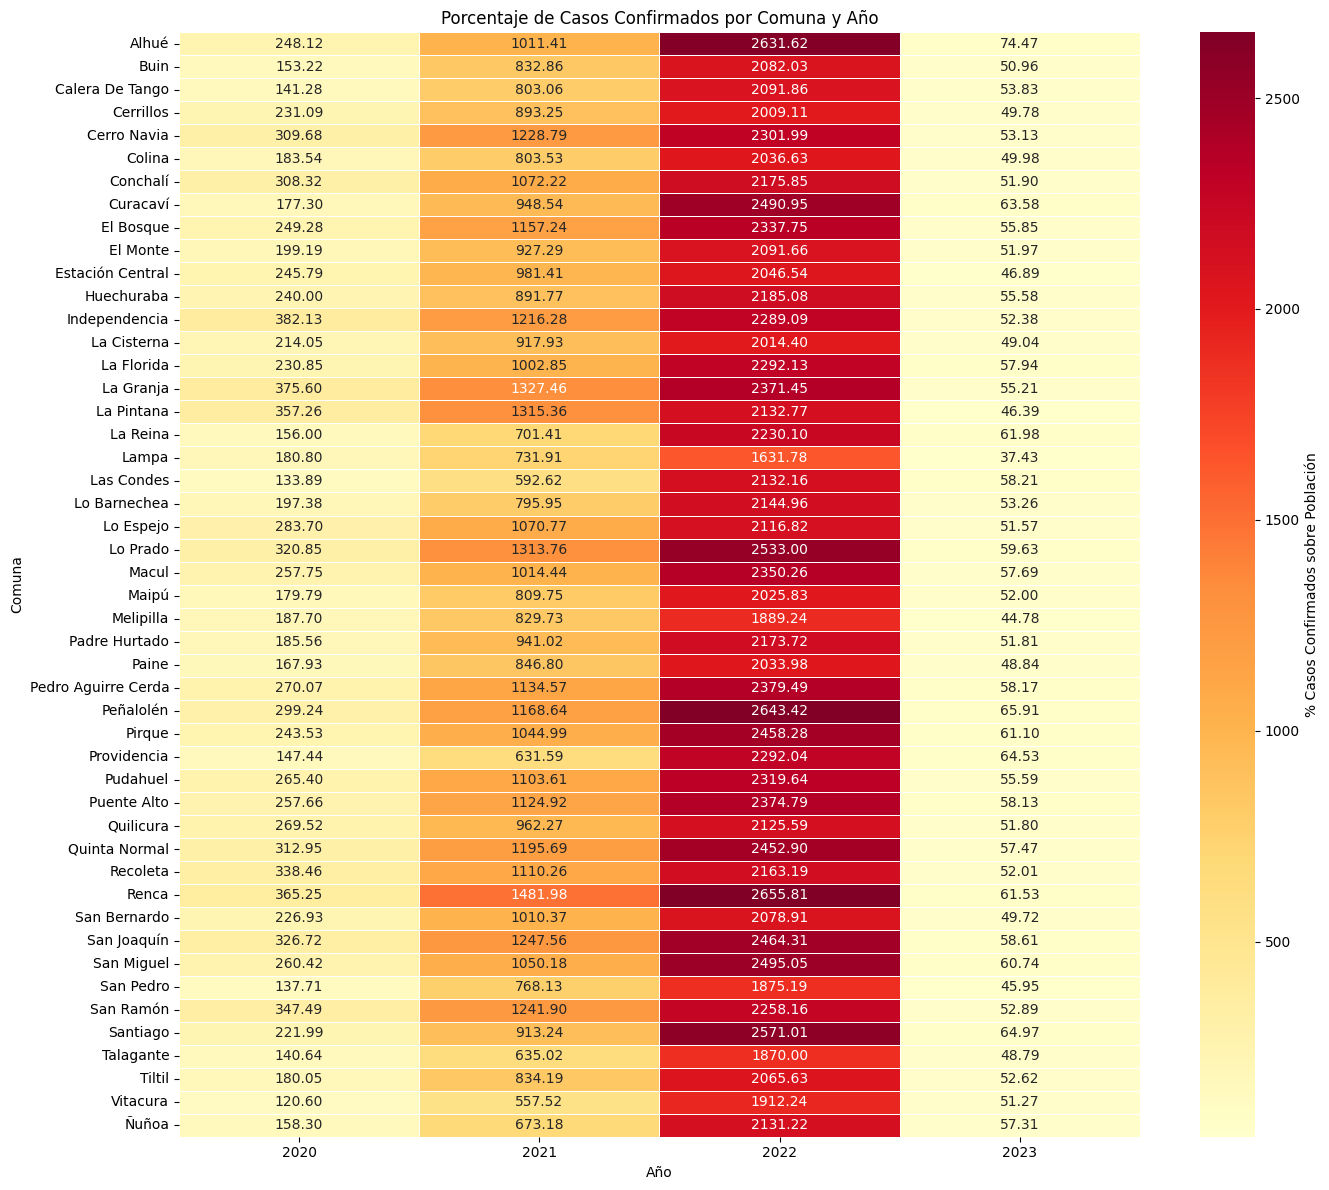

In [22]:
# Creamos un HeatMap para comparar todas las comunas

df_covid_m['% Casos sobre población'] = (df_covid_m['Casos confirmados'] / df_covid_m['Población']) * 100
heatmap_data_pct = df_covid_m.pivot(index='Comuna', columns='Año', values='% Casos sobre población')

plt.figure(figsize=(14, 12))
sns.heatmap(heatmap_data_pct, cmap='YlOrRd', annot=True, fmt='.2f', linewidths=0.5,
            cbar_kws={'label': '% Casos Confirmados sobre Población'})
plt.title('Porcentaje de Casos Confirmados por Comuna y Año')
plt.xlabel('Año')
plt.ylabel('Comuna')
plt.tight_layout()
plt.show()

Veamos las vacunaciones por comuna (%) para analizar si ambas se correlacionan:

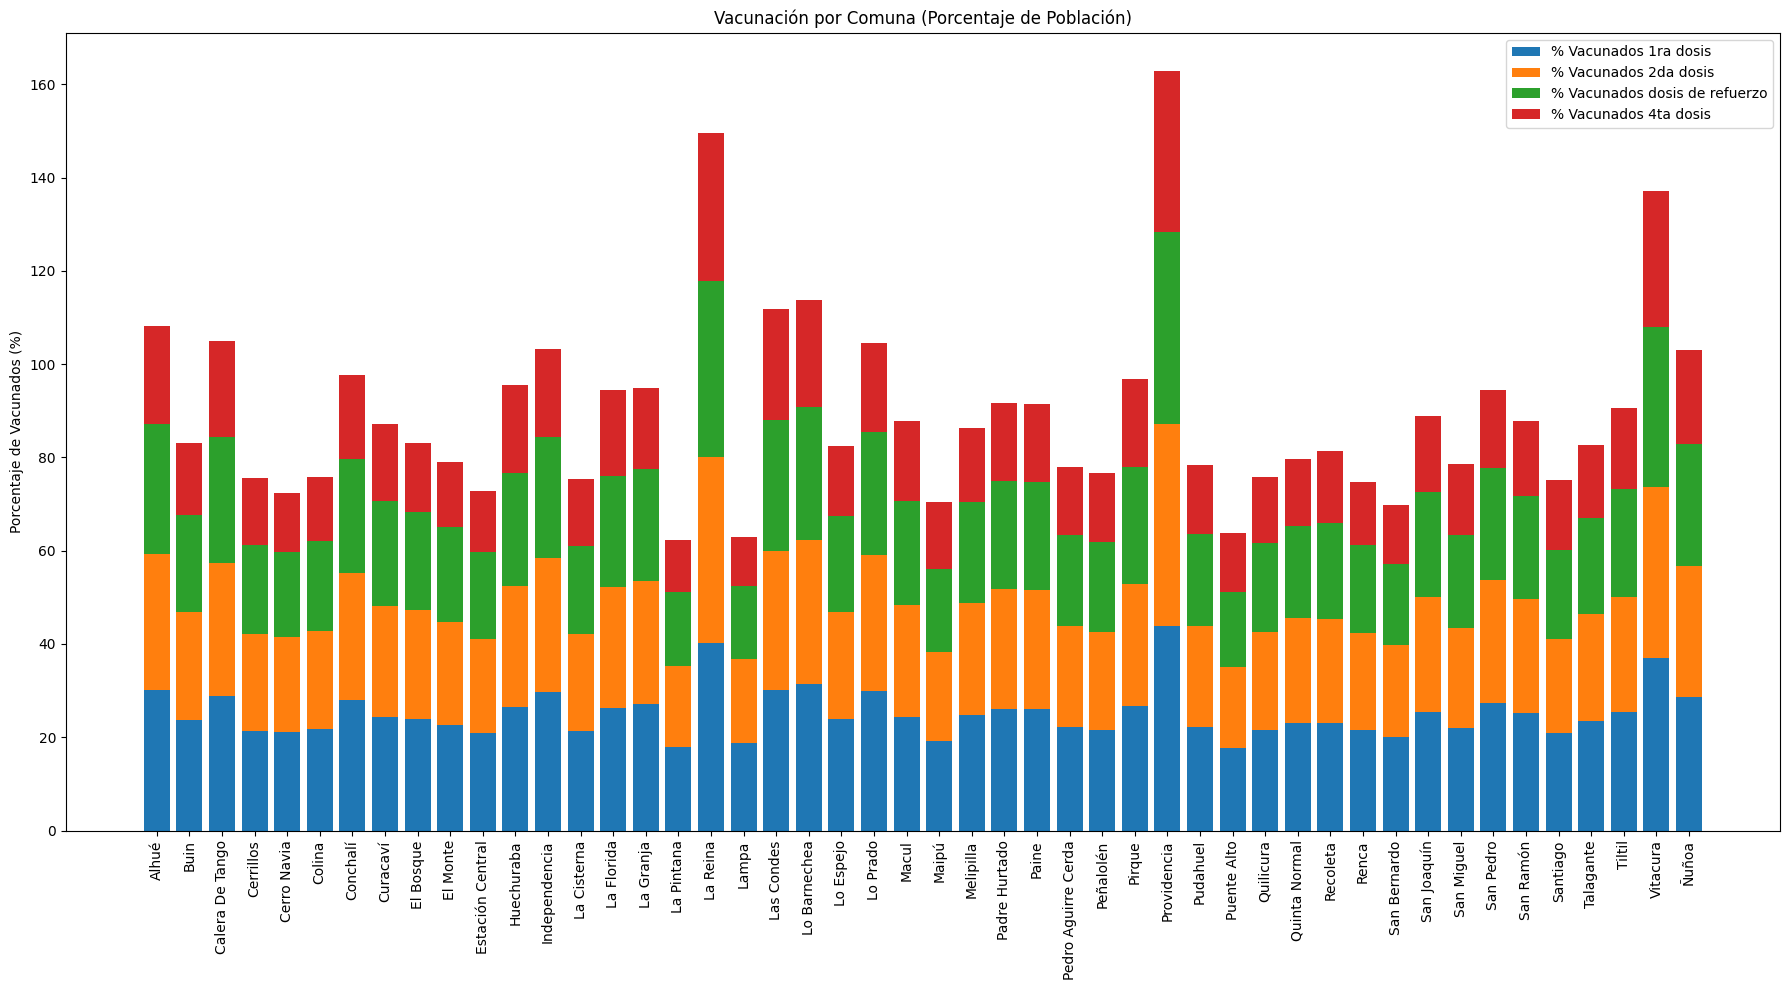

In [23]:
vacunacion_por_comuna_pct = df_covid_m.groupby('Comuna')[[
    '% Vacunados 1ra dosis', '% Vacunados 2da dosis',
    '% Vacunados dosis de refuerzo', '% Vacunados 4ta dosis'
]].mean()

vac_cols_pct = ['% Vacunados 1ra dosis', '% Vacunados 2da dosis', 
                '% Vacunados dosis de refuerzo', '% Vacunados 4ta dosis']
bottom = np.zeros(len(vacunacion_por_comuna_pct))

plt.figure(figsize=(18, 10))

for col in vac_cols_pct:
    plt.bar(range(len(vacunacion_por_comuna_pct)), vacunacion_por_comuna_pct[col], 
            bottom=bottom, label=col)
    bottom += vacunacion_por_comuna_pct[col].values

plt.title('Vacunación por Comuna (Porcentaje de Población)')
plt.ylabel('Porcentaje de Vacunados (%)')
plt.xticks(range(len(vacunacion_por_comuna_pct)), vacunacion_por_comuna_pct.index, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


Correlación:

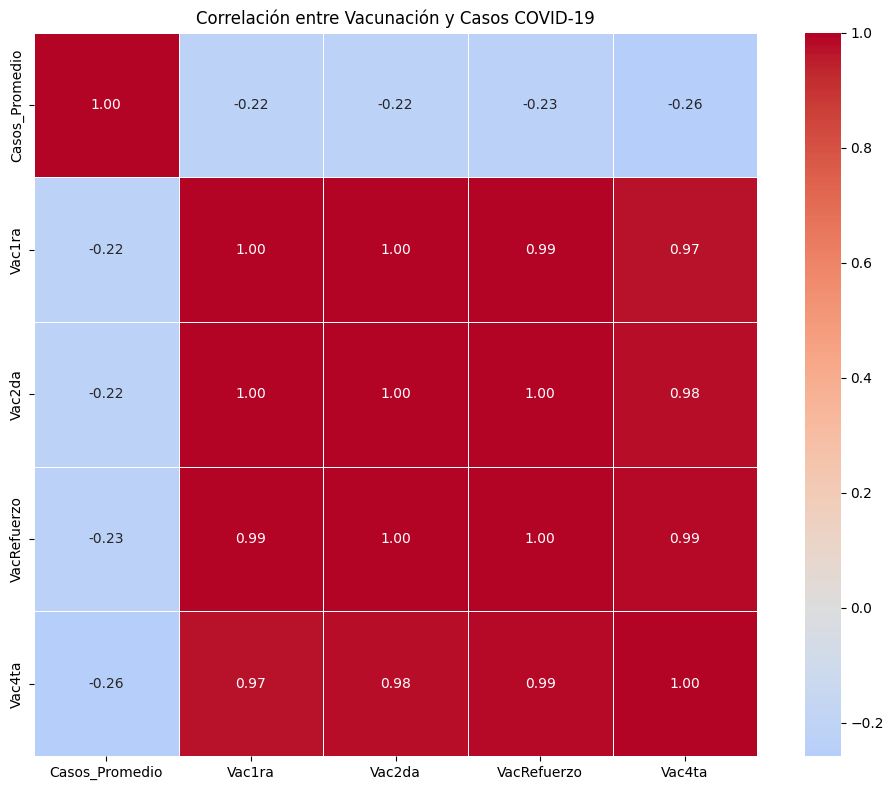

In [24]:
combinado_data = pd.DataFrame({
    'Casos_Promedio': heatmap_data_pct.mean(axis=1),
    'Vac1ra': vacunacion_por_comuna_pct['% Vacunados 1ra dosis'],
    'Vac2da': vacunacion_por_comuna_pct['% Vacunados 2da dosis'],
    'VacRefuerzo': vacunacion_por_comuna_pct['% Vacunados dosis de refuerzo'],
    'Vac4ta': vacunacion_por_comuna_pct['% Vacunados 4ta dosis']
})

# Heatmap de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(combinado_data.corr(), annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=0.5, square=True)
plt.title('Correlación entre Vacunación y Casos COVID-19')
plt.tight_layout()
plt.show()

Notamos dos cosas: la correlación entre tener la primera dosis y las que siguen es estrechamente positiva, y que la correlación entre el porcentaje de vacunación y la baja de casos promedio es débil pero existe (es decir, mientras más vacunas menos posibilidades de casos confirmados).

## **Comunas con más fallecimientos por covid-19**

En casos de comunas, se prefiere trabajar con los porcentajes sobre el total de población, debido a que de esta forma las comunas con mayor población no acaparan siempre los primeros puestos, así se trabaja de una forma más sincera con los datos. 

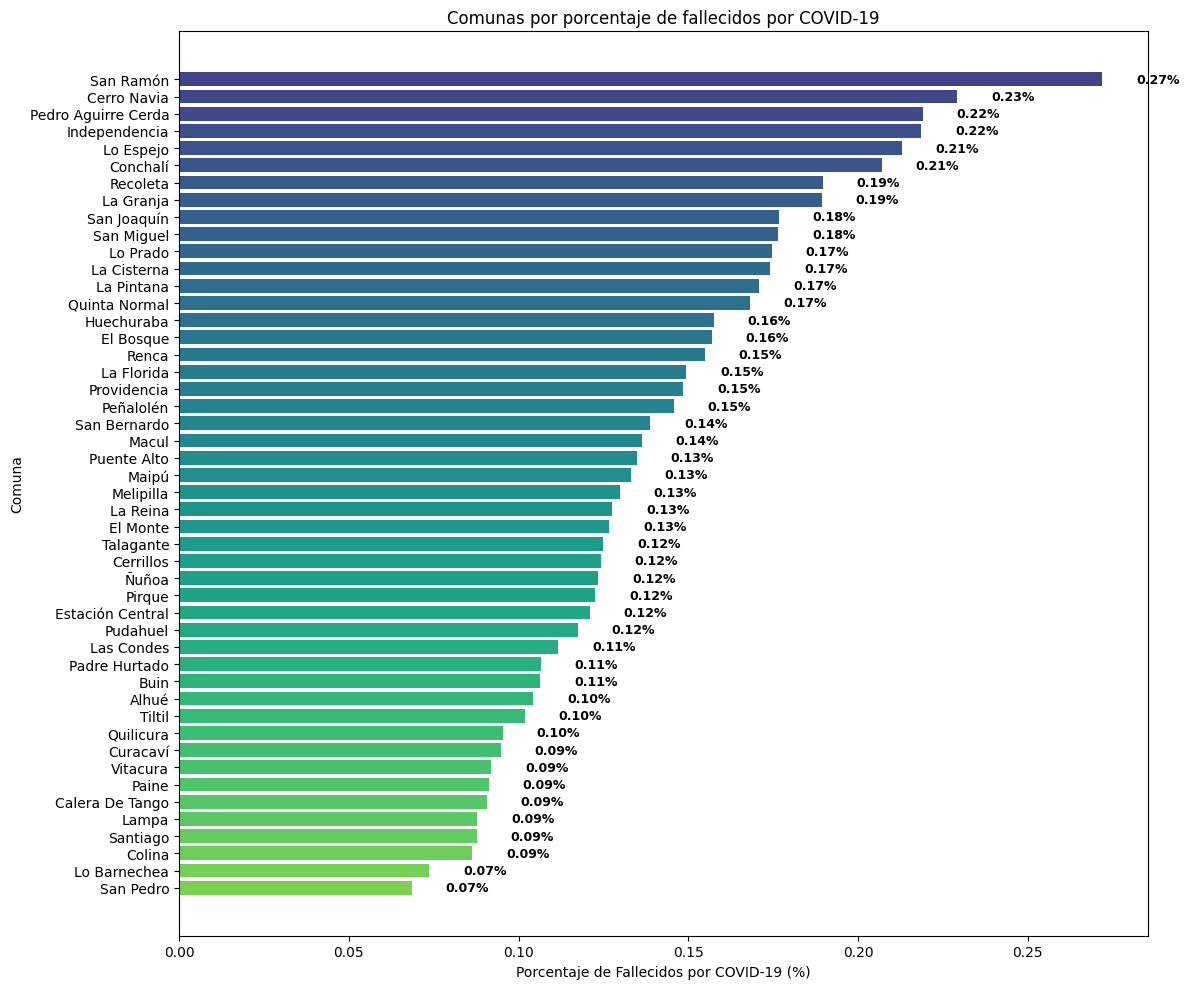

In [25]:
porcentaje_por_comuna = df_covid_m.groupby('Comuna')['% Fallecidos COVID'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 10))
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(porcentaje_por_comuna)))

bars = plt.barh(range(len(porcentaje_por_comuna)), porcentaje_por_comuna, color=colors)
plt.ylabel('Comuna')
plt.xlabel('Porcentaje de Fallecidos por COVID-19 (%)')
plt.title('Comunas por porcentaje de fallecidos por COVID-19')
plt.yticks(range(len(porcentaje_por_comuna)), porcentaje_por_comuna.index)

# Añadir etiquetas
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', 
             ha='left', va='center', fontweight='bold', fontsize=9)

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

De todas formas, veamos una comparación del total de muertes junto a el porcentaje de fallecidos por comuna:

C:\Users\isimo\AppData\Local\Temp\ipykernel_18984\3548252069.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  line = ax2.plot(fallecidos_por_comuna.values, x, 'ro-', linewidth=2, markersize=6,


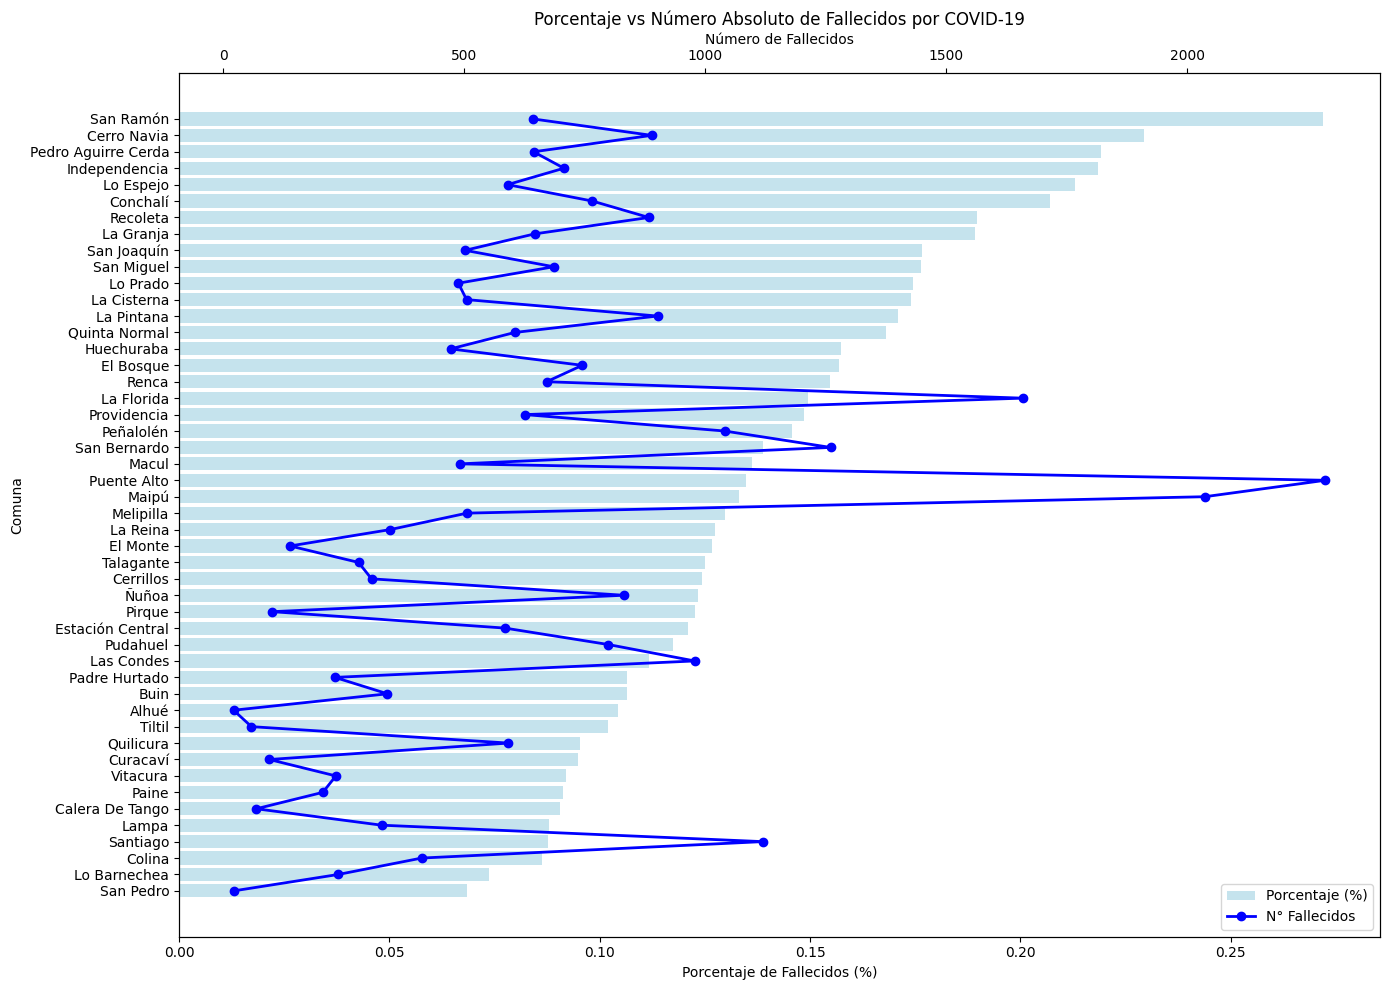

In [26]:
fig, ax1 = plt.subplots(figsize=(14, 10))
comunas_ordenadas = porcentaje_por_comuna.index
fallecidos_por_comuna = df_covid_m.groupby('Comuna')['Fallecidos por covid-19'].sum().reindex(comunas_ordenadas)
x = range(len(comunas_ordenadas))
bars = ax1.barh(x, porcentaje_por_comuna, alpha=0.7, color='lightblue', label='Porcentaje (%)')
ax1.set_xlabel('Porcentaje de Fallecidos (%)')
ax1.set_ylabel('Comuna')
ax2 = ax1.twiny()
line = ax2.plot(fallecidos_por_comuna.values, x, 'ro-', linewidth=2, markersize=6, 
                label='N° Fallecidos', color='b')
ax2.set_xlabel('Número de Fallecidos')
plt.yticks(x, comunas_ordenadas)
plt.title('Porcentaje vs Número Absoluto de Fallecidos por COVID-19')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='lower right')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## **Heatmap % vacunaciones por población vs muertes**

Veamos la correlación entre las muertes y la cantidad de vacunados:

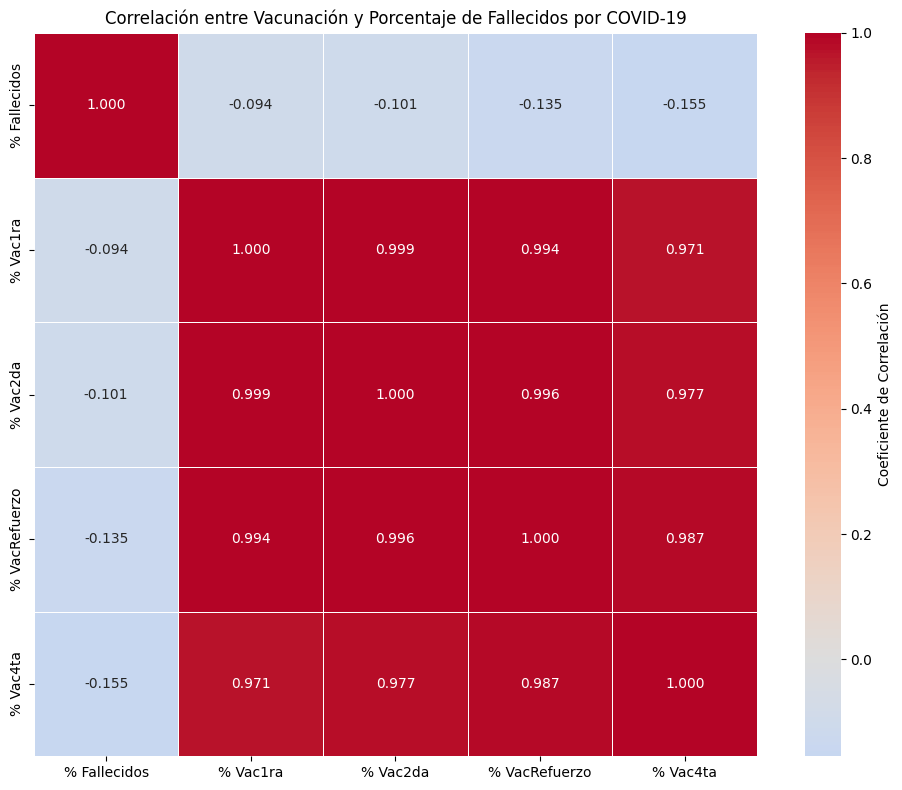

In [27]:
# Combinar los datos de fallecidos y vacunación
fallecidos_por_comuna = df_covid_m.groupby('Comuna')['% Fallecidos COVID'].mean()
vacunacion_por_comuna = df_covid_m.groupby('Comuna')[[
    '% Vacunados 1ra dosis', '% Vacunados 2da dosis',
    '% Vacunados dosis de refuerzo', '% Vacunados 4ta dosis'
]].mean()

combinado_mortalidad = pd.DataFrame({
    '% Fallecidos': fallecidos_por_comuna,
    '% Vac1ra': vacunacion_por_comuna['% Vacunados 1ra dosis'],
    '% Vac2da': vacunacion_por_comuna['% Vacunados 2da dosis'],
    '% VacRefuerzo': vacunacion_por_comuna['% Vacunados dosis de refuerzo'],
    '% Vac4ta': vacunacion_por_comuna['% Vacunados 4ta dosis']
})
corr_mortalidad = combinado_mortalidad.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_mortalidad, annot=True, cmap='coolwarm', center=0, 
            fmt='.3f', linewidths=0.5, square=True,
            cbar_kws={'label': 'Coeficiente de Correlación'})
plt.title('Correlación entre Vacunación y Porcentaje de Fallecidos por COVID-19')
plt.tight_layout()
plt.show()

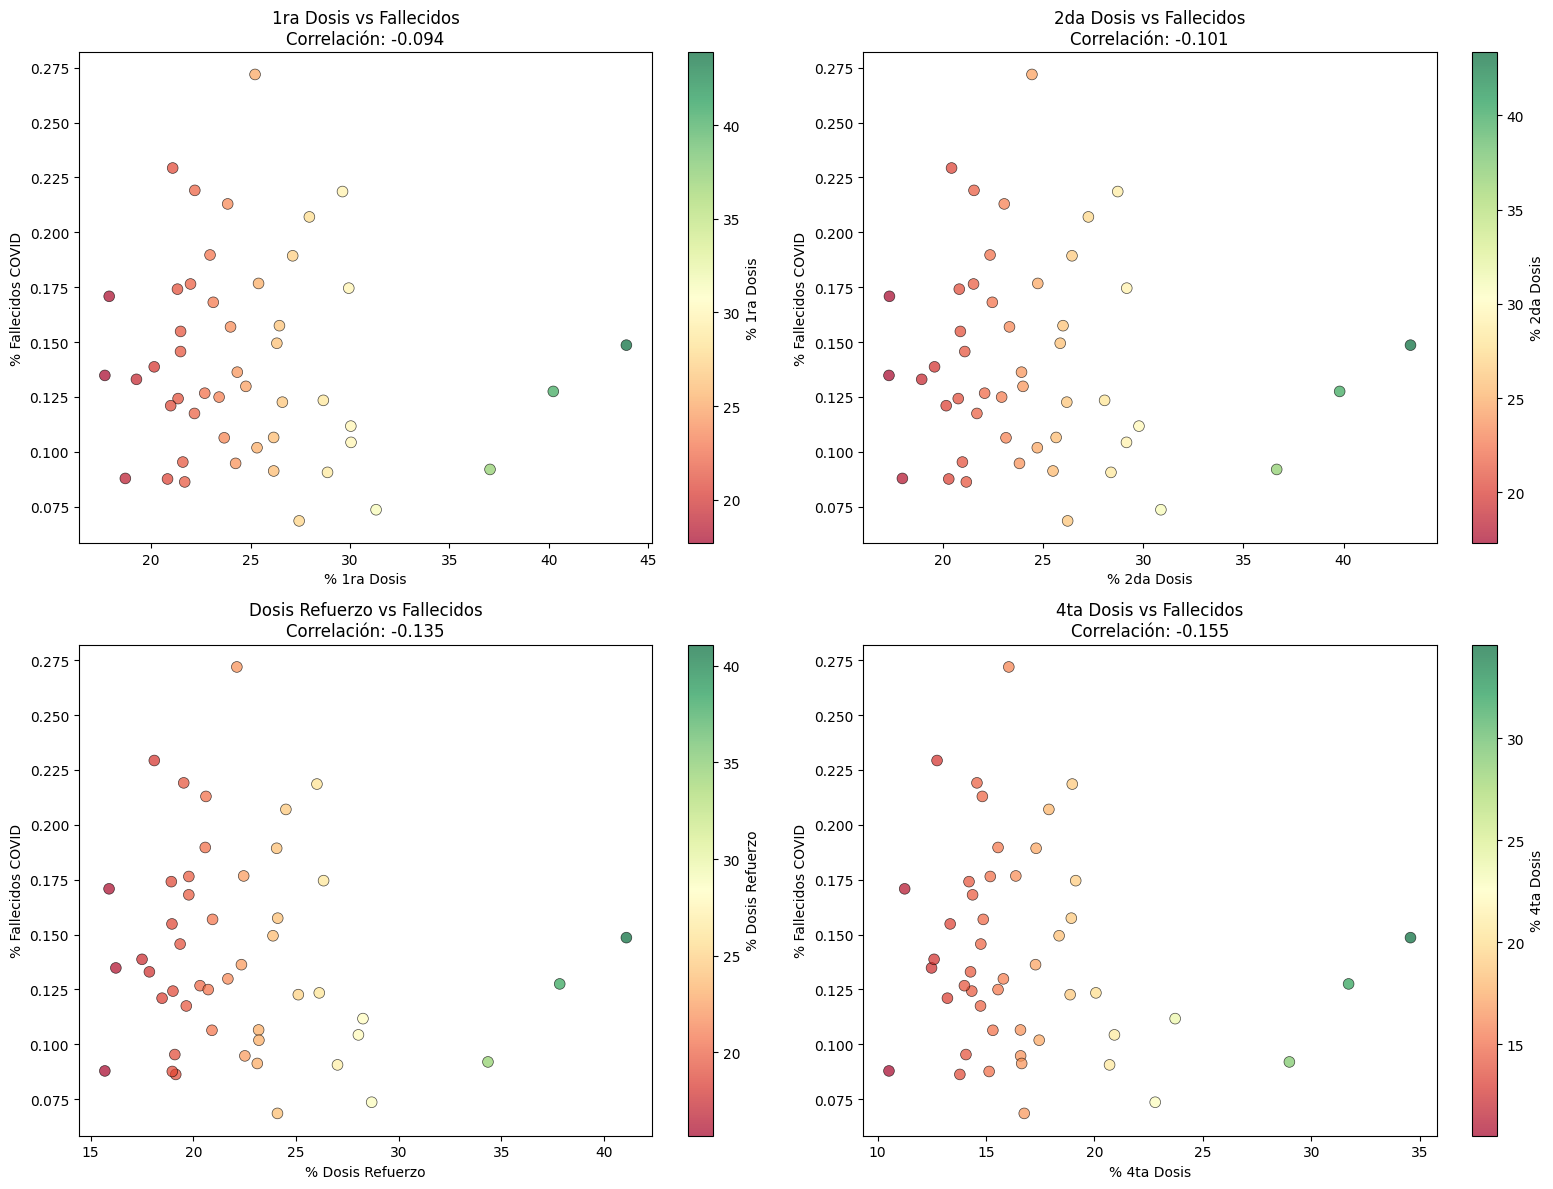

In [28]:
# Creemos gráficos para comparar la tasa de mortalidad junto a la cantidad de vacunados por comuna para comprobar si es que existe relación.

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

dosis_vacunas = ['% Vac1ra', '% Vac2da', '% VacRefuerzo', '% Vac4ta']
nombres_vacunas = ['1ra Dosis', '2da Dosis', 'Dosis Refuerzo', '4ta Dosis']

for i, (dosis, nombre) in enumerate(zip(dosis_vacunas, nombres_vacunas)):
    vacunacion_values = combinado_mortalidad[dosis]
    colors = plt.cm.RdYlGn((vacunacion_values - vacunacion_values.min()) / 
                          (vacunacion_values.max() - vacunacion_values.min()))
    scatter = axes[i].scatter(combinado_mortalidad[dosis], 
                             combinado_mortalidad['% Fallecidos'],
                             c=vacunacion_values, cmap='RdYlGn', 
                             s=60, alpha=0.7, edgecolors='black', linewidth=0.5)
    corr_val = corr_mortalidad.loc['% Fallecidos', dosis]
    axes[i].set_xlabel(f'% {nombre}')
    axes[i].set_ylabel('% Fallecidos COVID')
    axes[i].set_title(f'{nombre} vs Fallecidos\nCorrelación: {corr_val:.3f}')
    cbar = plt.colorbar(scatter, ax=axes[i])
    cbar.set_label(f'% {nombre}')

plt.tight_layout()
plt.show()

Gracias al heatmap y los gráficos, notamos que no hay una clara relación entre ambos, es decir, no parece que una variable conlleve necesariamente a la otra, ya que los datos son dispersos.

## **Heatmap Positividad de covid-19 vs muertes**

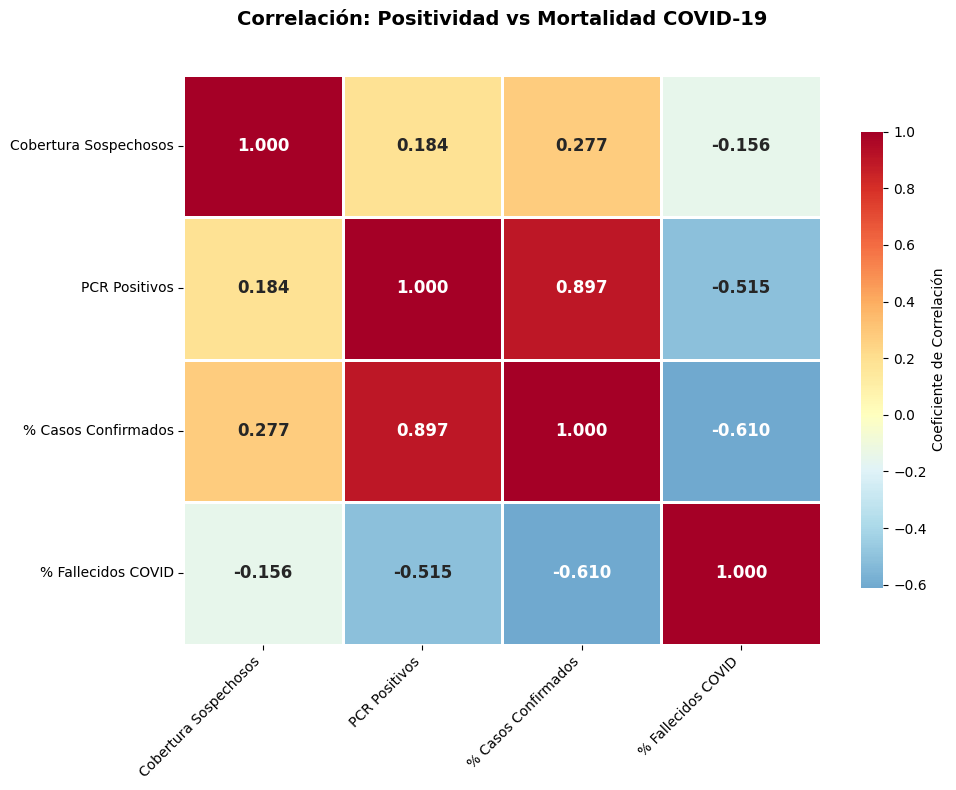

In [29]:
# Variables a usar
variables_positividad = [
    'Porcentaje promedio de cobertura de casos sospechosos',
    'Total de casos positivos según el test PCR', 
    '% Casos confirmados',
    '% Fallecidos COVID'
]

corr_positividad = df_covid_m[variables_positividad].corr()
nombres_cortos = {
    'Porcentaje promedio de cobertura de casos sospechosos': 'Cobertura Sospechosos',
    'Total de casos positivos según el test PCR': 'PCR Positivos', 
    '% Casos confirmados': '% Casos Confirmados',
    '% Fallecidos COVID': '% Fallecidos COVID'
}
corr_positividad_clean = corr_positividad.rename(index=nombres_cortos, columns=nombres_cortos)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_positividad_clean, 
            annot=True, 
            cmap='RdYlBu_r', 
            center=0,
            fmt='.3f', 
            linewidths=1, 
            linecolor='white',
            cbar_kws={'label': 'Coeficiente de Correlación', 'shrink': 0.8},
            annot_kws={'size': 12, 'weight': 'bold'})

plt.title('Correlación: Positividad vs Mortalidad COVID-19\n', 
          fontsize=14, 
          fontweight='bold', 
          pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Notamos que a más cobertura mayor cantidad de PCR positivos (lo cual tiene sentido), mayor % de casos confirmados, y menor % fallecidos, todo esto a un nivel de baja correlación. Sin embargo, a más casos de % fallecidos, menos % de casos confirmados y menos PCR positivos con una correlación más fuerte. 

## **Heatmap NSE por comuna**

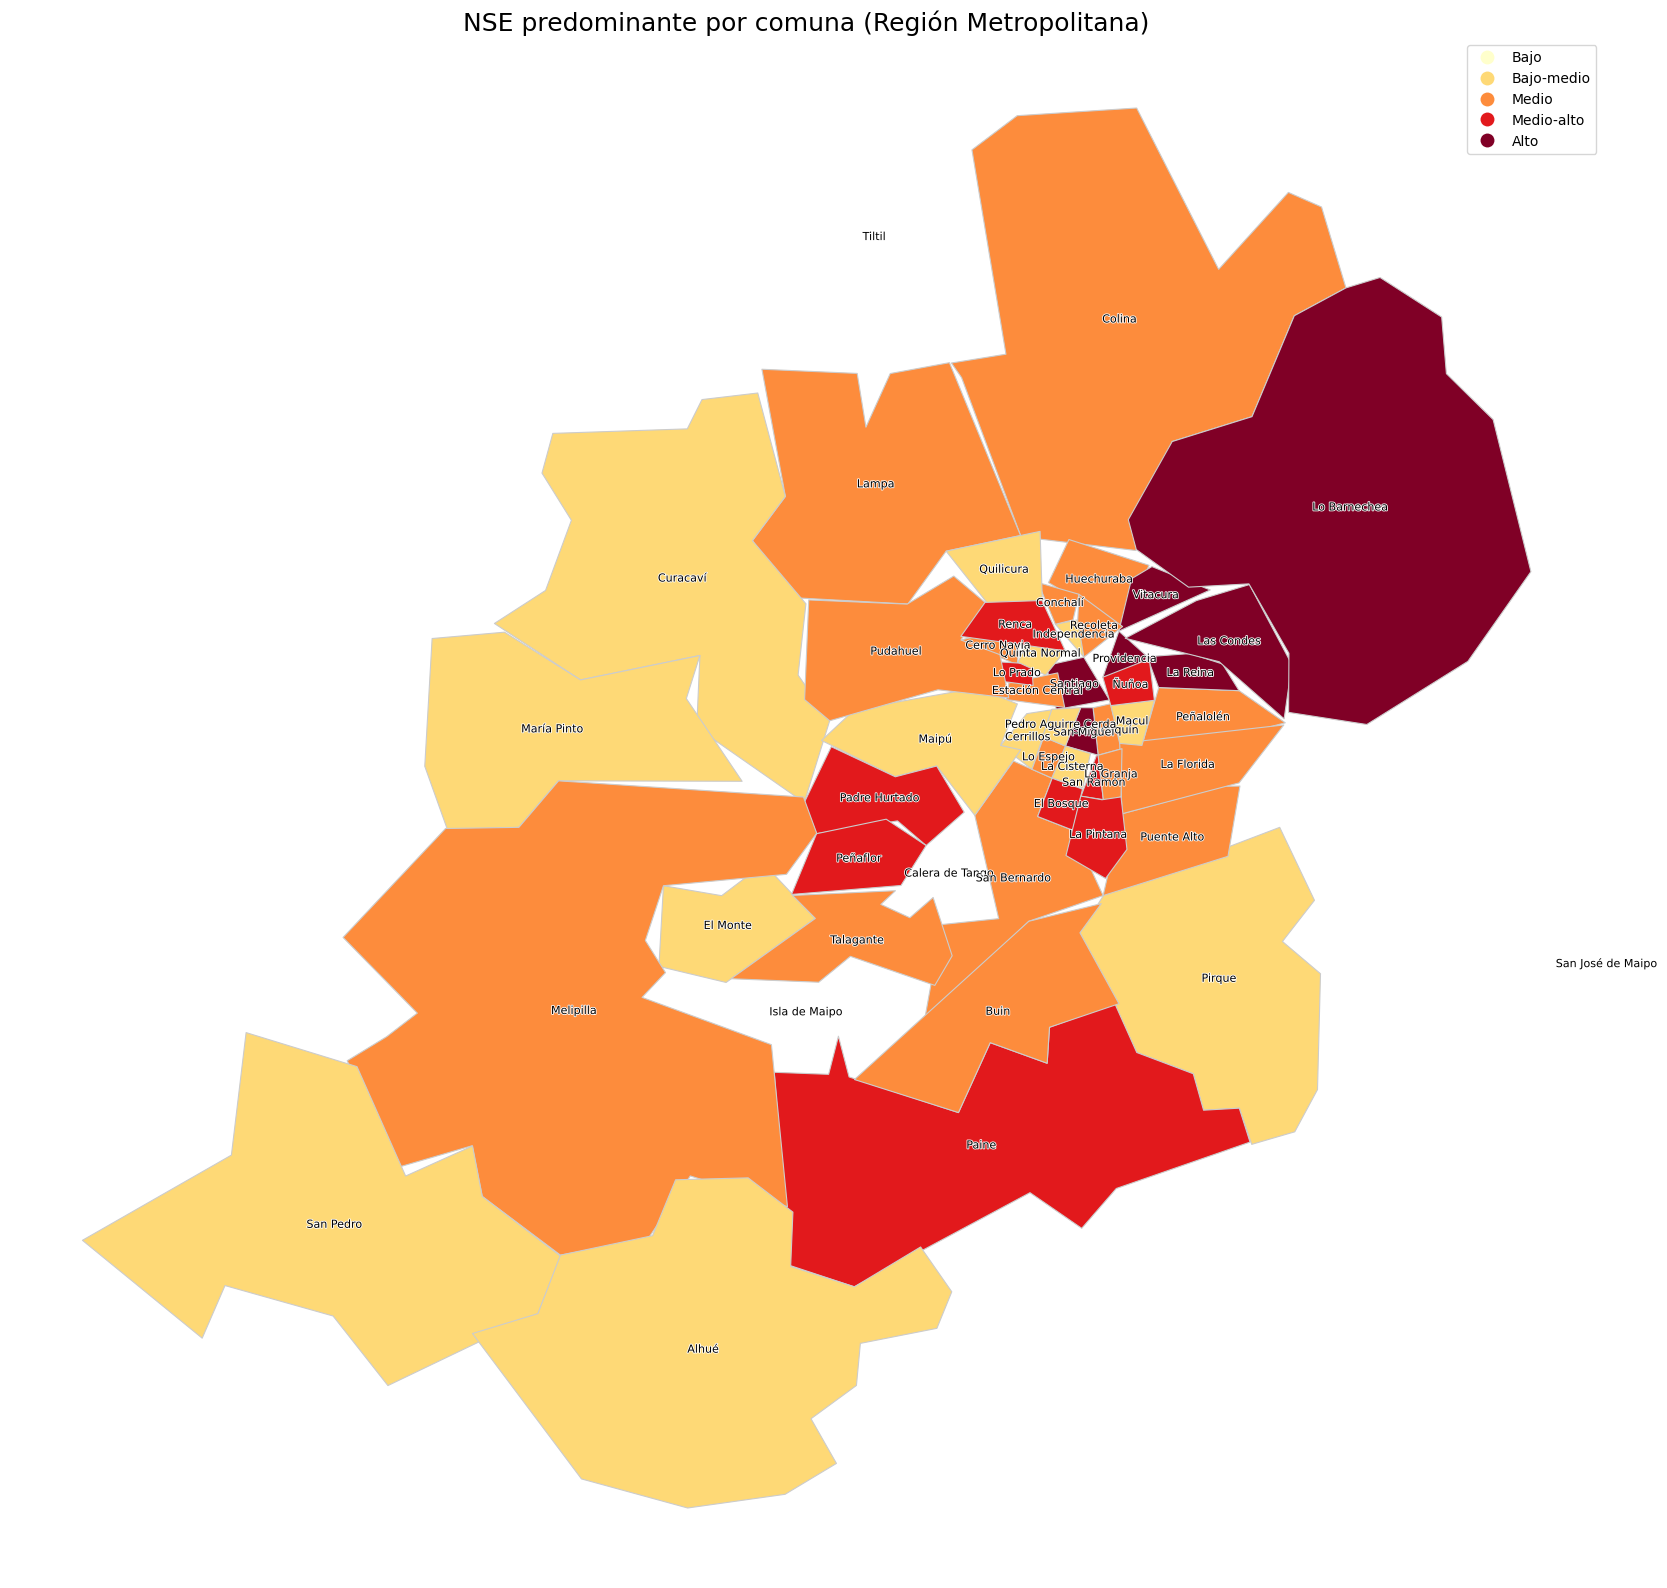

In [30]:
# El mapa utilizado para el gráfico fue descargado desde:
# https://github.com/fcortes/Chile-GeoJSON/blob/master/comunas.geojson

# Orden de categorías NSE
orden_nse = ['Bajo', 'Bajo-medio', 'Medio', 'Medio-alto', 'Alto']
df_nse["NSE"] = pd.Categorical(df_nse["NSE"], categories=orden_nse, ordered=True)


df_nse_rm = df_nse[df_nse["region"] == 13.0].copy()

# NSE predominante por comuna
nse_comuna = (
    df_nse_rm.groupby("Comuna")["NSE"]
             .agg(lambda x: x.mode().iloc[0])   # categoría más frecuente
             .reset_index()
)

# Cargar mapa y filtrar RM
geo = gpd.read_file("../../Data/Extra_Data/comunas.geojson")
geo_rm = geo[geo["codregion"] == 13].copy()

# Unir mapa con NSE por comuna
geo_nse = geo_rm.merge(nse_comuna, on="Comuna", how="left")

# Graficar
fig, ax = plt.subplots(1, 1, figsize=(22, 20))

geo_nse.plot(
    column="NSE",
    cmap="YlOrRd",
    linewidth=0.8,
    edgecolor="0.8",
    legend=True,
    ax=ax
)

# Etiquetas
for _, row in geo_nse.iterrows():
    x, y = row.geometry.centroid.coords[0]
    ax.text(
        x, y,
        row["Comuna"],
        fontsize=8,
        ha="center", va="center",
        path_effects=[pe.withStroke(linewidth=1.2, foreground="white")]
    )

ax.set_title("NSE predominante por comuna (Región Metropolitana)", fontsize=18)
ax.axis("off")

plt.show()



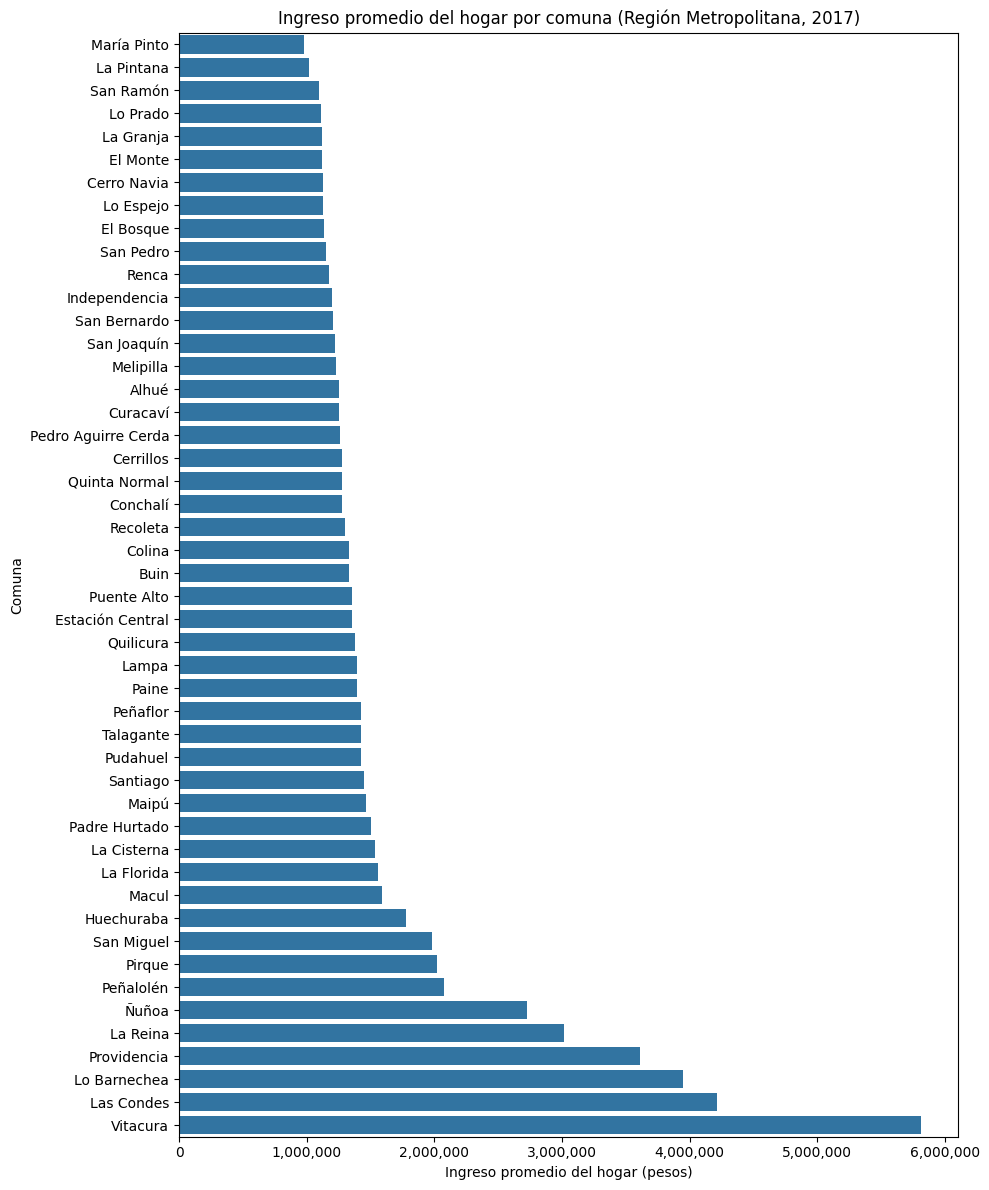

In [31]:
df_nse_rm = df_nse[df_nse["region"] == 13.0].copy()

# Ingreso promedio por comuna
ingreso_comuna = (
    df_nse_rm.groupby("Comuna", as_index=False)["Ingreso_hogar"]
             .mean()
             .rename(columns={"Ingreso_hogar": "Ingreso_promedio"})
)

# Ordenar de menor a mayor
ingreso_comuna = ingreso_comuna.sort_values("Ingreso_promedio")

# Gráfico de barras
plt.figure(figsize=(10, 12))
sns.barplot(
    data=ingreso_comuna,
    x="Ingreso_promedio",
    y="Comuna"
)
ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.xlabel("Ingreso promedio del hogar (pesos)")
plt.ylabel("Comuna")
plt.title("Ingreso promedio del hogar por comuna (Región Metropolitana, 2017)")
plt.tight_layout()
plt.show()


## **Gráficos Sistema de salud vs mortalidad**

### **Datos necesarios para los gráficos**

In [32]:

# Limpiar df_nse
df_nse = df_nse.copy()
for c in ["Comuna", "Sistema_previsional"]:
    df_nse[c] = df_nse[c].astype(str).str.strip()

# Normalizar nombres
df_nse["Sistema_previsional"] = (
    df_nse["Sistema_previsional"]
    .str.title()
    .str.replace(r"\s+", " ", regex=True)
)

# Contar de personas por comuna y sistema
conteos = (
    df_nse.groupby(["Comuna","Sistema_previsional"])
          .size()
          .reset_index(name="n")
)

# Pivot para calcular % ISAPRE
pivot = conteos.pivot(index="Comuna", columns="Sistema_previsional", values="n").fillna(0)
for col in ["Fonasa","Isapre","Otro Sistema"]:
    if col not in pivot.columns:
        pivot[col] = 0

pivot["Total"] = pivot[["Fonasa","Isapre","Otro Sistema"]].sum(axis=1).replace(0, np.nan)
pivot["pct_isapre"] = pivot["Isapre"] / pivot["Total"] * 100

# Sistema predominante por comuna
predom = conteos.loc[conteos.groupby("Comuna")["n"].idxmax(), ["Comuna","Sistema_previsional"]]
predom = predom.rename(columns={"Sistema_previsional": "Sistema_predominante"})

sist_comuna = pivot.reset_index().merge(predom, on="Comuna", how="left")

# Calcular mortalidad comuna
df_covid = df_covid_m.copy()
df_covid = df_covid[df_covid["Año"].between(2020, 2022)]

mortalidad = (
    df_covid.groupby("Comuna", as_index=False)
            .agg({"Fallecidos por covid-19":"sum", "Total fallecidos":"sum"})
)
mortalidad["mort_covid_%"] = mortalidad["Fallecidos por covid-19"] / mortalidad["Total fallecidos"] * 100

# Unir
df_plot = sist_comuna.merge(mortalidad, on="Comuna", how="left")


### **Boxplot**

C:\Users\isimo\AppData\Local\Temp\ipykernel_18984\3430861733.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x="Sistema_predominante", y="mort_covid_%", palette="pastel")


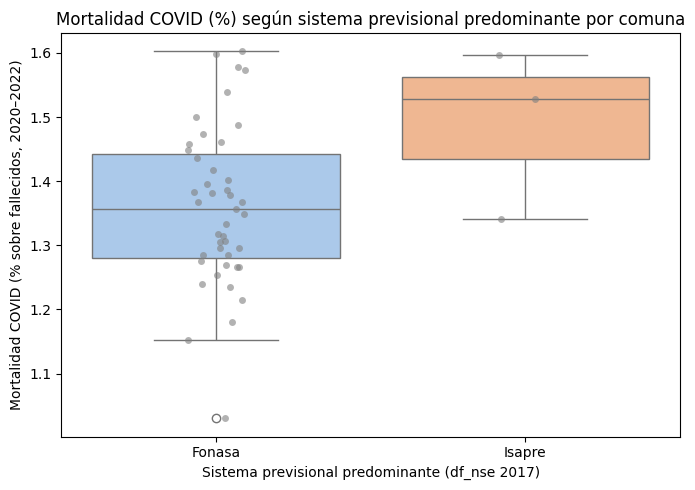

In [33]:

# Boxplot: mortalidad según sistema predominante
plt.figure(figsize=(7,5))
sns.boxplot(data=df_plot, x="Sistema_predominante", y="mort_covid_%", palette="pastel")
sns.stripplot(data=df_plot, x="Sistema_predominante", y="mort_covid_%", color="gray", alpha=0.6)
plt.title("Mortalidad COVID (%) según sistema previsional predominante por comuna")
plt.xlabel("Sistema previsional predominante (df_nse 2017)")
plt.ylabel("Mortalidad COVID (% sobre fallecidos, 2020–2022)")
plt.tight_layout()
plt.show()


### **Gráfico de dispersión % Isapre vs mortalidad**

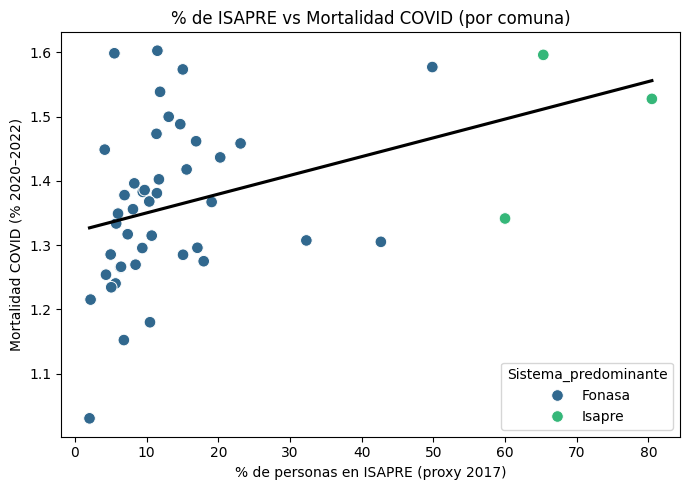

Correlación %ISAPRE ↔ mortalidad COVID: 0.392


In [34]:
# Dispersión: % ISAPRE vs mortalidad
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_plot, x="pct_isapre", y="mort_covid_%", hue="Sistema_predominante", palette="viridis", s=70)
sns.regplot(data=df_plot, x="pct_isapre", y="mort_covid_%", scatter=False, color="black", ci=None)
plt.title("% de ISAPRE vs Mortalidad COVID (por comuna)")
plt.xlabel("% de personas en ISAPRE (proxy 2017)")
plt.ylabel("Mortalidad COVID (% 2020–2022)")
plt.tight_layout()
plt.show()

# Correlación numérica
corr = df_plot[["pct_isapre", "mort_covid_%"]].corr().iloc[0,1]
print(f"Correlación %ISAPRE ↔ mortalidad COVID: {corr:.3f}")

### **Gráfico de dispersión % Fonasa vs mortalidad**

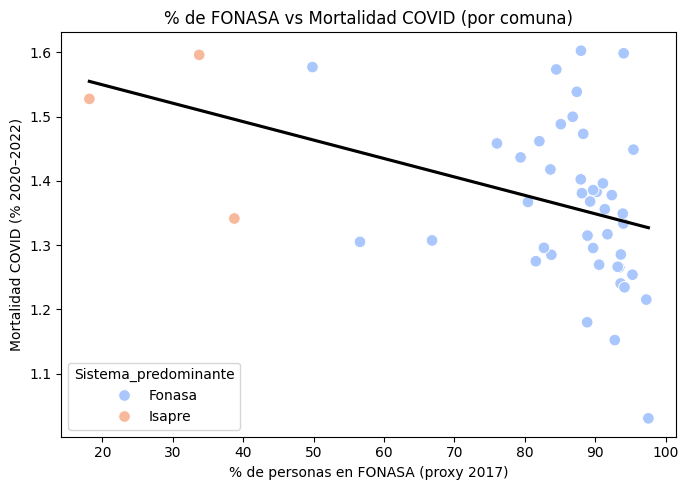

Correlación %FONASA ↔ mortalidad COVID: -0.388


In [35]:

# Dispersión: % FONASA vs mortalidad
df_plot["pct_fonasa"] = df_plot["Fonasa"] / df_plot["Total"] * 100

plt.figure(figsize=(7,5))
sns.scatterplot(data=df_plot, x="pct_fonasa", y="mort_covid_%",
                hue="Sistema_predominante", palette="coolwarm", s=70)
sns.regplot(data=df_plot, x="pct_fonasa", y="mort_covid_%", scatter=False, color="black", ci=None)
plt.title("% de FONASA vs Mortalidad COVID (por comuna)")
plt.xlabel("% de personas en FONASA (proxy 2017)")
plt.ylabel("Mortalidad COVID (% 2020–2022)")
plt.tight_layout()
plt.show()

# Correlación 
corr_fonasa = df_plot[["pct_fonasa", "mort_covid_%"]].corr().iloc[0,1]
print(f"Correlación %FONASA ↔ mortalidad COVID: {corr_fonasa:.3f}")


### **Dispersion: positividad vs mortalidad**

Preparar datos

In [36]:
# 1.1 Cargar y preparar datos de NSE
df_nse['Comuna'] = df_nse['Comuna'].str.strip().str.title()
# Agrega por comuna usando la moda (el valor más frecuente de NSE)
df_nse_agg = df_nse.groupby('Comuna')['NSE'].apply(lambda x: x.mode().iloc[0]).reset_index()
# 1.2 Cargar datos de COVID
df_covid = pd.read_csv(ruta_covid)
df_covid['Comuna'] = df_covid['Comuna'].str.strip().str.title()
# Filtra por los años principales de la pandemia (2020-2022)
anios_pandemia = [2020, 2021, 2022]
df_covid_filtrado = df_covid[df_covid['Año'].isin(anios_pandemia)]
df_covid_agg = df_covid_filtrado.groupby('Comuna')[['% Fallecidos COVID', '% Casos confirmados', 
                                                    'Porcentaje promedio de cobertura de casos sospechosos',
                                                    '% Vacunados 1ra dosis']].mean().reset_index()
df_covid_agg = df_covid_agg.rename(columns={
    '% Fallecidos COVID': 'Mortalidad (% Pob)',
    '% Casos confirmados': 'Positividad (% Pob)'
})
# 1.3 Fusionar (Merge) los datasets
df_merged = pd.merge(df_covid_agg, df_nse_agg, on='Comuna', how='inner')
df_merged = df_merged.dropna(subset=['Mortalidad (% Pob)', 'Positividad (% Pob)', 'NSE'])
df_merged.head()

,Comuna,Mortalidad (% Pob),Positividad (% Pob),Porcentaje promedio de cobertura de casos sospechosos,% Vacunados 1ra dosis,NSE
0,Alhué,0.104307,1297.048862,81.803234,40.048897,Bajo-medio
1,Buin,0.106396,1022.702276,90.860639,31.558159,Medio
2,Cerrillos,0.124247,1044.484282,90.678385,28.468120,Bajo-medio
3,Cerro Navia,0.229274,1280.152135,92.141217,28.105439,Medio
4,Colina,0.086293,1007.897649,89.212427,28.899831,Medio


In [37]:
df_merged.isna().sum()

Comuna                                                   0
Mortalidad (% Pob)                                       0
Positividad (% Pob)                                      0
Porcentaje promedio de cobertura de casos sospechosos    0
% Vacunados 1ra dosis                                    0
NSE                                                      0
dtype: int64

In [38]:
# Se copia para uso posterior
df_copia_m = df_merged.copy()

In [39]:
sns.set_theme(style="whitegrid")

Usa scatterplot de seaborn para el gráfico de dispersión

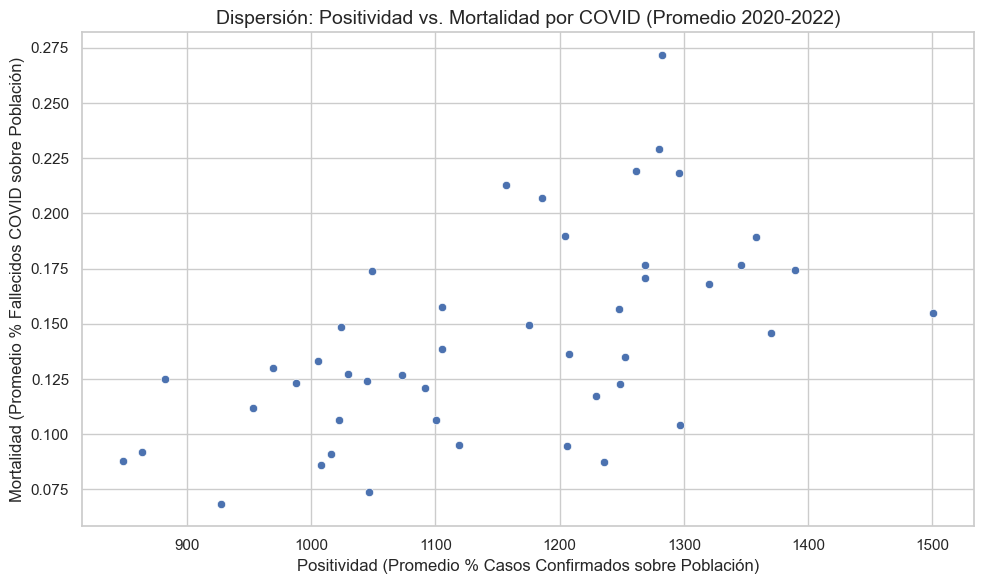

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_merged,
    x='Positividad (% Pob)',
    y='Mortalidad (% Pob)'
)
plt.title('Dispersión: Positividad vs. Mortalidad por COVID (Promedio 2020-2022)', fontsize=14)
plt.xlabel('Positividad (Promedio % Casos Confirmados sobre Población)', fontsize=12)
plt.ylabel('Mortalidad (Promedio % Fallecidos COVID sobre Población)', fontsize=12)
plt.tight_layout()
plt.show()

### **Barras: promedio de mortalidad por grupo nse**

Agrupar dada la mortalidad y el NSE

In [41]:
order_data = df_merged.groupby('NSE')['Mortalidad (% Pob)'].mean().sort_values(ascending=False).index

Usa barplot de seaborn, que calcula automáticamente la media por categoría

C:\Users\isimo\AppData\Local\Temp\ipykernel_18984\813589574.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


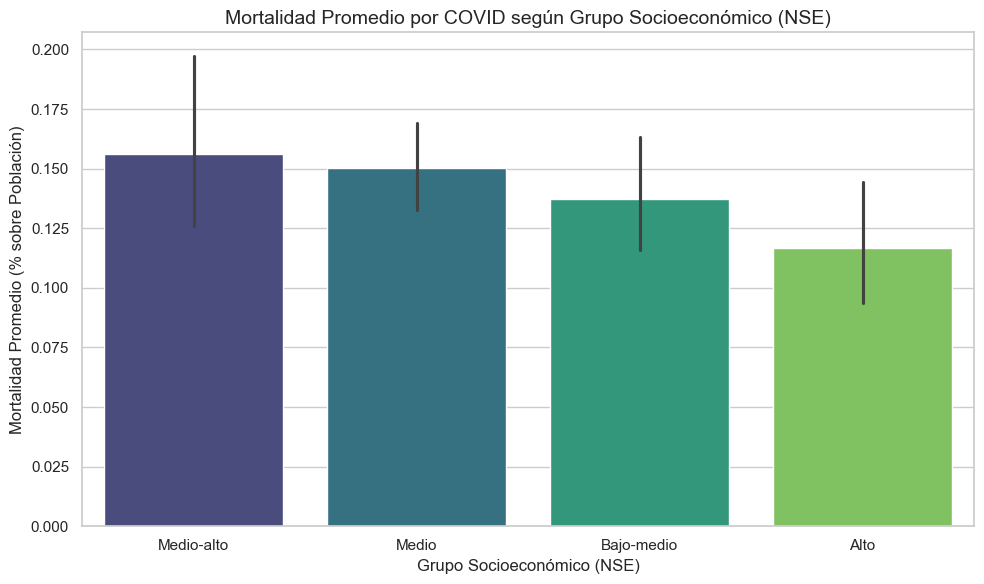

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_merged,
    x='NSE',
    y='Mortalidad (% Pob)',
    order=order_data,
    estimator='mean', 
    palette='viridis'
)
plt.title('Mortalidad Promedio por COVID según Grupo Socioeconómico (NSE)', fontsize=14)
plt.xlabel('Grupo Socioeconómico (NSE)', fontsize=12)
plt.ylabel('Mortalidad Promedio (% sobre Población)', fontsize=12)
plt.tight_layout()
plt.show()

### **Gráfico 3: Dispersion: nse vs mortalidad por covid**


Usar stripplot de seaborn para mostrar la distribución de puntos por categoría

C:\Users\isimo\AppData\Local\Temp\ipykernel_18984\1700465646.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


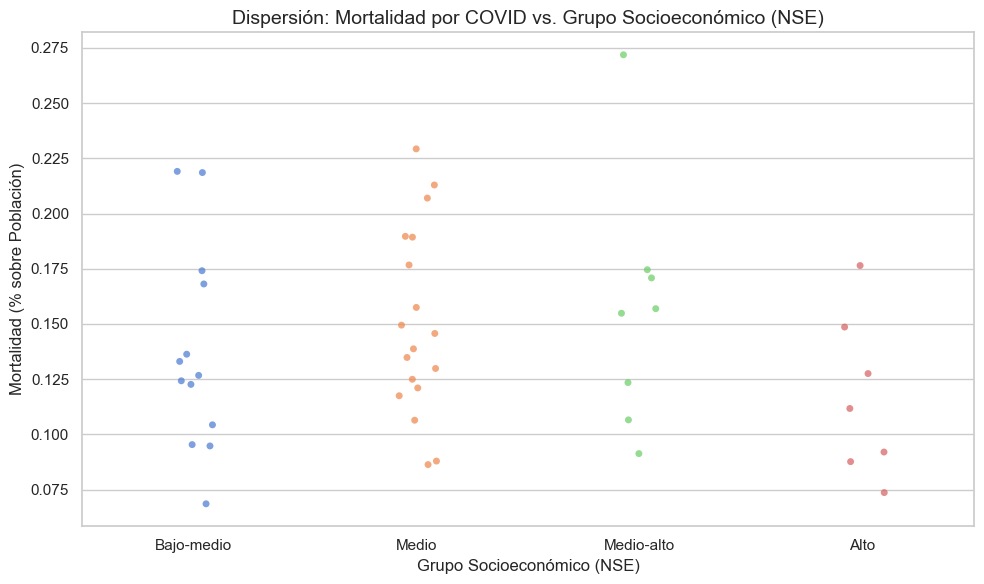

In [43]:
plt.figure(figsize=(10, 6))

sns.stripplot(
    data=df_merged,
    x='NSE',
    y='Mortalidad (% Pob)',
    jitter=True,
    alpha=0.7,
    palette='muted'
)
plt.title('Dispersión: Mortalidad por COVID vs. Grupo Socioeconómico (NSE)', fontsize=14)
plt.xlabel('Grupo Socioeconómico (NSE)', fontsize=12)
plt.ylabel('Mortalidad (% sobre Población)', fontsize=12)


plt.tight_layout()
plt.show()

# Modelamiento Matematico (Estadística Inferencial)

#### Se pretende resolver una interrogante aplicando y construyendo metodos estadisticos.
Para analizar la relación entre las variables socioeconómicas y la Tasa de Mortalidad por COVID-19, hemos seleccionado la librería statsmodels en Python, puesto que nos proporciona métricas clave como los $P$-valores y los Errores Estándar, que son esenciales para determinar si una relación es verdadera o si simplemente es un resultado del azar.
 1. Enfoque en Inferencia: Esta librería es ideal porque nos proporciona métricas clave como los $P$-valores y los Errores Estándar, que son esenciales para determinar si una relación es estadísticamente significativa o simplemente un resultado del azar.
 2. Modelo Global: Utilizaremos el modelo de Mínimos Cuadrados Ordinarios (OLS), que es la técnica de regresión más conocida. El OLS funciona encontrando la línea que minimiza la suma de los errores al cuadrado  entre los datos observados y la línea de regresión. Esto proporciona un modelo lineal global que cuantifica la relación promedio que existe entre la pobreza y la mortalidad."

Observacion: Este modelo se centra en la relación y la inferencia estadística (el impacto y la significancia), no en la predicción (precisión). Dado el modelo lineal, aunque es útil para entender la asociación entre las variables socioeconómicas y la Tasa de Mortalidad, no es adecuado para hacer pronósticos o predicciones precisas del número de muertes, pues gran parte de la varianza sigue sin ser explicada por las variables incluidas.

Links de Bibliograficos de interes: 
- https://www.statsmodels.org/stable/index.html
- https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html
- https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/09_regression.html#:~:text=The%20method%20we%20will%20use,is%20%E2%80%9Cleast%20squares%E2%80%9D.

## PREGUNTA: ¿El nivel socioeconómico de una comuna (pobreza, ingresos) se relaciona su número de muertes, bajo el contexto de COVID-19?

### 1. Preparacion y contruccion de datos necesarios para el modelamiento.

In [44]:
# Datos socioeconómicos
path_socio = '../../Data/Nivel socioeconomico y geografico/Dataset_Socio_RM.csv'

df_socio_raw = pd.read_csv(path_socio, low_memory=False)

df_socio_2021 = df_socio_raw[df_socio_raw['Año'] == 2021].copy()

# (1 si es 'Pobreza Extrema' o 'Pobreza No Extrema', 0 si es 'No Pobreza')
categorias_pobreza = ['Pobreza Extrema', 'Pobreza No Extrema']
df_socio_2021['es_pobre'] = df_socio_2021['Pobreza Categoria'].apply(lambda x: 1 if x in categorias_pobreza else 0)
# - INDICE_POBREZA: será el promedio (mean) de la columna 'es_pobre'
# - INGRESO_PROMEDIO: será el promedio (mean) de 'Ingreso_hogar'
df_socio_agg = df_socio_2021.groupby('Comuna').agg(
    INDICE_POBREZA=('es_pobre', 'mean'),
    INGRESO_PROMEDIO=('Ingreso_hogar', 'mean')
).reset_index()

print("Datos socioeconómicos agregados por comuna para 2021 listos.")
print(df_socio_agg.head())


Datos socioeconómicos agregados por comuna para 2021 listos.
        Comuna  INDICE_POBREZA  INGRESO_PROMEDIO
0        Alhué        0.000000      1.163712e+06
1         Buin        0.104478      1.024474e+06
2    Cerrillos        0.100000      1.046512e+06
3  Cerro Navia        0.102740      9.880384e+05
4       Colina        0.162162      1.005093e+06


In [45]:
print("Columnas en el DataFrame del censo:")
print(df_censo.columns.tolist())

print("\nPrimeras filas:")
print(df_censo.head())

Columnas en el DataFrame del censo:
['Comuna', 'Año', 'Población']

Primeras filas:
     Comuna   Año  Población
0  Santiago  2017     411183
1  Santiago  2018     415136
2  Santiago  2019     419090
3  Santiago  2020     423043
4  Santiago  2021     426996


Usar el año 2020, que es el año donde comienza la pandemia y es estándar epidemiológico.

In [46]:
df_pob_2020 = df_censo[df_censo["Año"] == 2020][["Comuna", "Población"]]  


Usar los años del periodo del covid, entre el 2020-2022, porque:

- 2020 es el inicio
- 2021 es el año más mortal (segunda ola)
- 2022 completa el periodo antes de la vacunación masiva

Si se usa un solo año, se puede sesgar el análisis.

In [47]:
df_covid = df_covid[df_covid["Año"].between(2020, 2022)]

mortalidad = (
    df_covid.groupby("Comuna", as_index=False)
            .agg({"Fallecidos por covid-19":"sum", "Total fallecidos":"sum"})
)


Limpieza y merge

In [48]:
df_final = pd.merge(df_pob_2020, df_socio_agg, on='Comuna', how='inner')
df_final.dropna(subset=['INDICE_POBREZA', 'INGRESO_PROMEDIO'], inplace=True)
print(f"Datos combinados listos. {df_final.shape[0]} / 52 comunas tienen datos completos.")
print(df_final.head())

mortalidad = mortalidad.rename(columns={"Fallecidos por covid-19": "Muertes_COVID"})
df_final = df_final.merge(mortalidad[['Comuna', 'Muertes_COVID']], on='Comuna', how='left')

Datos combinados listos. 48 / 52 comunas tienen datos completos.
        Comuna  Población  INDICE_POBREZA  INGRESO_PROMEDIO
0     Santiago     423043        0.089072      1.365024e+06
1    Cerrillos      82070        0.100000      1.046512e+06
2  Cerro Navia     129640        0.102740      9.880384e+05
3     Conchalí     123696        0.084291      1.517745e+06
4    El Bosque     158865        0.161172      1.079027e+06


Para normalizar el modelo se usara la tasa epidemiologica, con:

TASA = Muertes / Poblacion *100.000

In [49]:
df_final["Tasa_Mortalidad"] = (df_final['Muertes_COVID'] / df_final["Población"]) * 100000

Verificar los datos y eliminar los datos nulos de las columnas

In [50]:
df_final.columns

Index(['Comuna', 'Población', 'INDICE_POBREZA', 'INGRESO_PROMEDIO',
       'Muertes_COVID', 'Tasa_Mortalidad'],
      dtype='object')

In [51]:
df_final[['INDICE_POBREZA', 'INGRESO_PROMEDIO', 'Tasa_Mortalidad']].describe()


,INDICE_POBREZA,INGRESO_PROMEDIO,Tasa_Mortalidad
count,48.000000,4.800000e+01,46.000000
mean,0.106550,1.522110e+06,430.227626
std,0.059663,9.347457e+05,135.115425
min,0.000000,7.114247e+05,208.254449
25%,0.068915,1.033671e+06,330.535250
50%,0.097104,1.274955e+06,401.438972
75%,0.148897,1.501949e+06,519.239874
max,0.264463,5.300669e+06,810.589348


In [52]:
df_final[['INDICE_POBREZA', 'INGRESO_PROMEDIO', 'Tasa_Mortalidad']].isna().sum()


INDICE_POBREZA      0
INGRESO_PROMEDIO    0
Tasa_Mortalidad     2
dtype: int64

In [53]:
df_final[['INDICE_POBREZA', 'INGRESO_PROMEDIO', 'Tasa_Mortalidad']].applymap(np.isinf).sum()


C:\Users\isimo\AppData\Local\Temp\ipykernel_18984\3545231485.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_final[['INDICE_POBREZA', 'INGRESO_PROMEDIO', 'Tasa_Mortalidad']].applymap(np.isinf).sum()


INDICE_POBREZA      0
INGRESO_PROMEDIO    0
Tasa_Mortalidad     0
dtype: int64

In [54]:
df_final['INDICE_POBREZA'].unique()


array([0.08907186, 0.1       , 0.10273973, 0.08429119, 0.16117216,
       0.09345794, 0.11392405, 0.21311475, 0.11555556, 0.06417736,
       0.09012876, 0.15441176, 0.06756757, 0.03761243, 0.04672897,
       0.16847826, 0.19371728, 0.03968254, 0.07820738, 0.01851852,
       0.14685315, 0.19783198, 0.0455312 , 0.064     , 0.09866667,
       0.05485232, 0.11420613, 0.07723577, 0.26446281, 0.075     ,
       0.09302326, 0.00705882, 0.1017316 , 0.11267606, 0.16216216,
       0.0955414 , 0.10973725, 0.10447761, 0.07843137, 0.06936416,
       0.        , 0.03278689, 0.26027397, 0.17142857, 0.07964602,
       0.14705882, 0.1547619 , 0.16304348])

In [55]:
df_final['INGRESO_PROMEDIO'].unique()


array([1365023.56511976, 1046511.66428571,  988038.4109589 ,
       1517744.56704981, 1079026.80952381, 1320729.93925234,
       1832042.61392405,  979567.86885246, 1296077.97777778,
       1427590.43173862, 1160736.24034335, 1013941.19485294,
       2766260.42342342, 3946275.28781684, 4693543.58130841,
        958034.08152174, 1062391.85863874, 1372152.75396825,
       1331345.90333919, 2438225.37037037,  872859.29370629,
       1575493.45799458, 2941200.44856661, 1297442.116     ,
       1370789.696     , 1018297.77637131, 1285021.26740947,
       1196186.65853659, 1358298.18181818, 1617602.93571429,
       1041931.74418605, 5300669.31764706, 1233546.53896104,
       1672477.47887324, 1005093.26576577,  968694.37579618,
       1051049.41267388, 1024474.34328358, 1033932.34313725,
       1264887.73988439, 1163712.20408163, 1567530.27868852,
        864375.24657534, 1179836.88571429, 1496684.45132743,
       1032885.10294118,  711424.73809524, 1319619.80434783])

In [56]:
df_final['Tasa_Mortalidad'].unique()


array([264.51211815, 375.28938711, 685.74514039, 619.26012159,
       468.95162559, 372.21317317, 474.20981775, 664.39875202,
       530.55135317, 449.72956551, 566.21965115, 512.34227421,
       381.63321419, 336.16564923, 222.75036115, 631.51585212,
       521.38980298, 411.80910845, 398.05119142, 376.06404402,
       654.9174743 , 436.47779209, 448.4979617 , 352.81545853,
       285.65224734, 512.79008662, 568.65018032, 463.99059572,
       531.09890924, 548.17289021, 810.58934762, 277.30046809,
       404.82675328, 371.78786222, 263.48101913, 274.61749706,
       417.23650356, 325.4189411 , 276.54202236, 394.40044896,
       325.34753032, 287.46818386,          nan, 208.25444907,
       376.66045601, 382.01506074, 328.65845021])

In [57]:
df_final.dtypes


Comuna               object
Población             int64
INDICE_POBREZA      float64
INGRESO_PROMEDIO    float64
Muertes_COVID       float64
Tasa_Mortalidad     float64
dtype: object

In [58]:
df_final[['Comuna','INDICE_POBREZA','INGRESO_PROMEDIO','Tasa_Mortalidad']].head(20)

,Comuna,INDICE_POBREZA,INGRESO_PROMEDIO,Tasa_Mortalidad
0,Santiago,0.089072,1.365024e+06,264.512118
1,Cerrillos,0.100000,1.046512e+06,375.289387
2,Cerro Navia,0.102740,9.880384e+05,685.745140
3,Conchalí,0.084291,1.517745e+06,619.260122
4,El Bosque,0.161172,1.079027e+06,468.951626
5,Estación Central,0.093458,1.320730e+06,372.213173
6,Huechuraba,0.113924,1.832043e+06,474.209818
7,Independencia,0.213115,9.795679e+05,664.398752
8,La Cisterna,0.115556,1.296078e+06,530.551353
9,La Florida,0.064177,1.427590e+06,449.729566


In [59]:
df_final[df_final['Tasa_Mortalidad'].isna()]


,Comuna,Población,INDICE_POBREZA,INGRESO_PROMEDIO,Muertes_COVID,Tasa_Mortalidad
42,María Pinto,14203,0.260274,8.643752e+05,NaN,NaN
47,Peñaflor,91555,0.163043,1.319620e+06,NaN,NaN


In [60]:
df_final = df_final.dropna(subset=['Tasa_Mortalidad'])

In [61]:
df_final.head()

,Comuna,Población,INDICE_POBREZA,INGRESO_PROMEDIO,Muertes_COVID,Tasa_Mortalidad
0,Santiago,423043,0.089072,1.365024e+06,1119.0,264.512118
1,Cerrillos,82070,0.100000,1.046512e+06,308.0,375.289387
2,Cerro Navia,129640,0.102740,9.880384e+05,889.0,685.745140
3,Conchalí,123696,0.084291,1.517745e+06,766.0,619.260122
4,El Bosque,158865,0.161172,1.079027e+06,745.0,468.951626


In [62]:
df_final['Tasa_Mortalidad'].unique()

array([264.51211815, 375.28938711, 685.74514039, 619.26012159,
       468.95162559, 372.21317317, 474.20981775, 664.39875202,
       530.55135317, 449.72956551, 566.21965115, 512.34227421,
       381.63321419, 336.16564923, 222.75036115, 631.51585212,
       521.38980298, 411.80910845, 398.05119142, 376.06404402,
       654.9174743 , 436.47779209, 448.4979617 , 352.81545853,
       285.65224734, 512.79008662, 568.65018032, 463.99059572,
       531.09890924, 548.17289021, 810.58934762, 277.30046809,
       404.82675328, 371.78786222, 263.48101913, 274.61749706,
       417.23650356, 325.4189411 , 276.54202236, 394.40044896,
       325.34753032, 287.46818386, 208.25444907, 376.66045601,
       382.01506074, 328.65845021])

### 2. Visualización y Gráfico de Relación. 
Variable $Y$ (Dependiente): Tasa de Mortalidad en Covid (Construccion con datasets del Censo y Covid)

Variables $X$ (Independientes): INDICE_POBREZA y INGRESO_PROMEDIO (del archivo Dataset_Socio_RM.csv).


Modelo :  $covid\_muertes\_ (TasaMortalidad)= \beta_0 + \beta_1 \cdot INDICE\_POBREZA + \beta_2 \cdot INGRESO\_PROMEDIO + \epsilon$

Se evaluara si la formulación matemática (el modelo de regresión con multivariable) es válida y útil para el análisis.

#### Visualizar cada variable (POBREZA O INGRESO) con la mortalidad.

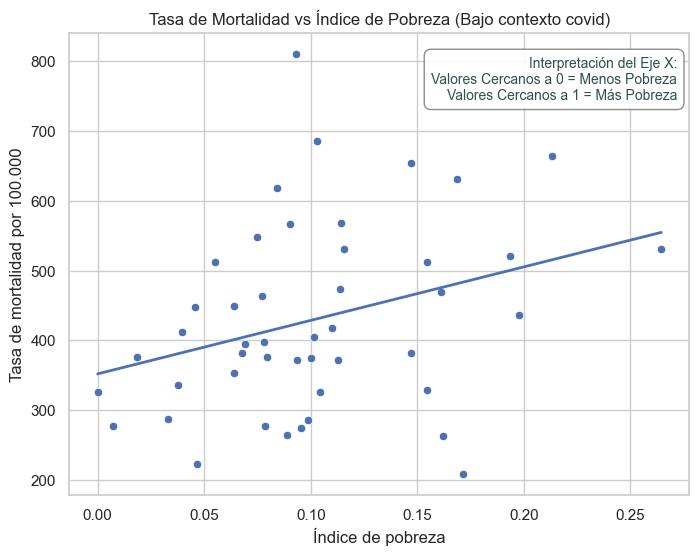

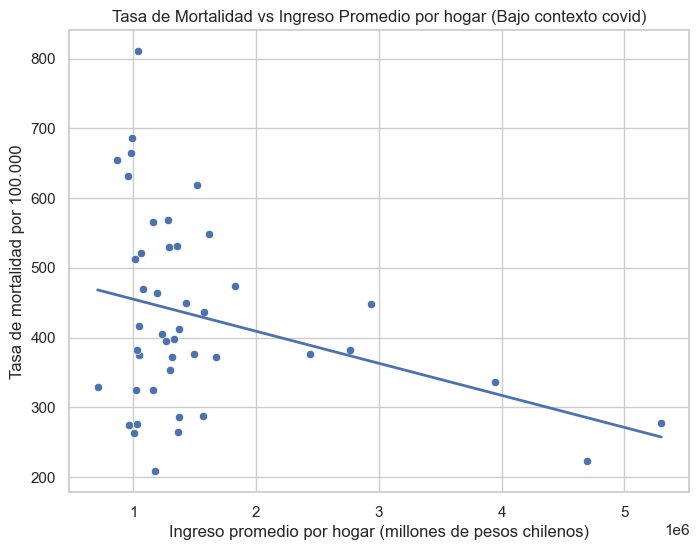

In [63]:
df = df_final[['Comuna','INDICE_POBREZA','INGRESO_PROMEDIO','Tasa_Mortalidad']].copy()
X1 = sm.add_constant(df['INDICE_POBREZA'])
y = df['Tasa_Mortalidad']

model1 = sm.OLS(y, X1).fit()

# grafico pobreza vs mortalidad
# Línea de regresión
x_vals = np.linspace(df['INDICE_POBREZA'].min(), df['INDICE_POBREZA'].max(), 100)
X_plot = sm.add_constant(x_vals)
y_pred = model1.predict(X_plot)

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='INDICE_POBREZA', y='Tasa_Mortalidad')
plt.plot(x_vals, y_pred, linewidth=2)
plt.title("Tasa de Mortalidad vs Índice de Pobreza (Bajo contexto covid)")
plt.xlabel("Índice de pobreza")
plt.ylabel("Tasa de mortalidad por 100.000")
plt.grid(True)


plt.text(
    x=0.98,
    y=0.95,
    s='Interpretación del Eje X:\n'+
      'Valores Cercanos a 0 = Menos Pobreza\n'+
      'Valores Cercanos a 1 = Más Pobreza',
    fontsize=10,
    color='darkslategray',
    transform=plt.gca().transAxes,
    ha='right',
    va='top', 
    bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.9, edgecolor='gray') # Recuadro ligero
)

plt.show()


# grafico ingreso vs mortalidad 

X2 = sm.add_constant(df['INGRESO_PROMEDIO'])

model2 = sm.OLS(y, X2).fit()

# Línea de regresión
x_vals2 = np.linspace(df['INGRESO_PROMEDIO'].min(), df['INGRESO_PROMEDIO'].max(), 100)
X_plot2 = sm.add_constant(x_vals2)
y_pred2 = model2.predict(X_plot2)

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='INGRESO_PROMEDIO', y='Tasa_Mortalidad')
plt.plot(x_vals2, y_pred2, linewidth=2)
plt.title("Tasa de Mortalidad vs Ingreso Promedio por hogar (Bajo contexto covid)")
plt.xlabel("Ingreso promedio por hogar (millones de pesos chilenos)")
plt.ylabel("Tasa de mortalidad por 100.000")
plt.grid(True)
plt.show()

#### Probar Modelo multivariable.

In [64]:
X = df_final[['INDICE_POBREZA', 'INGRESO_PROMEDIO']]
y = df_final['Tasa_Mortalidad']

X = sm.add_constant(X)
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:        Tasa_Mortalidad   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     3.459
Date:                Thu, 20 Nov 2025   Prob (F-statistic):             0.0405
Time:                        22:02:44   Log-Likelihood:                -287.02
No. Observations:                  46   AIC:                             580.0
Df Residuals:                      43   BIC:                             585.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              427.1883     67.266  

#### Analisis: 
- Cond. No. = $3.76 \times 10^7$ (Extremo). Esto indica que la fórmula es inestable (Multicolinealidad). 
- R2 = 0.139 (Bajo). La fórmula explica muy poco de la mortalidad.

El planteamiento es válido en la forma matemática ($\text{Regresión Lineal Múltiple}$), pero es inválido en la práctica estadística para la inferencia, debido a la Multicolinealidad entre las variables $X$

#### Evaluar Correlacion Lineal Directa con Pearson entre las variables de estudio

In [65]:
variables_de_interes = ['Tasa_Mortalidad', 'INDICE_POBREZA', 'INGRESO_PROMEDIO']
df_modelo = df.dropna(subset=variables_de_interes).copy()

MATRIZ DE CORRELACIÓN DE PEARSON ENTRE VARIABLES DE INTERÉS
                  Tasa_Mortalidad  INDICE_POBREZA  INGRESO_PROMEDIO
Tasa_Mortalidad          1.000000        0.316256         -0.323163
INDICE_POBREZA           0.316256        1.000000         -0.475732
INGRESO_PROMEDIO        -0.323163       -0.475732          1.000000


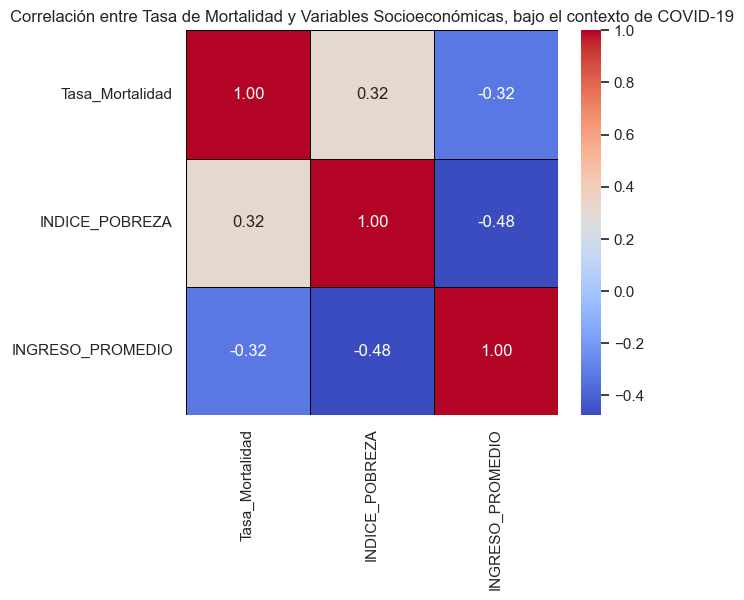

In [66]:
print("MATRIZ DE CORRELACIÓN DE PEARSON ENTRE VARIABLES DE INTERÉS")
# Muestra la fuerza y dirección de la relación lineal entre cada par de variables.
correlacion = df_modelo[variables_de_interes].corr()
print(correlacion)

# Visualización de la correlación con un heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='black')
plt.title('Correlación entre Tasa de Mortalidad y Variables Socioeconómicas, bajo el contexto de COVID-19')
plt.show()




Observacioon : Dado que el código demostró que el planteamiento de la fórmula con $\text{X}_1$ y $\text{X}_2$ juntas es defectuoso, la estadística le exige modificar la fórmula (el modelo) para hacerla válida. Se usara como unica variable $X$ = Indice de pobreza.

### 3. Inferencia Estadística (validar la existencia de la relación).
#### $$\text{Tasa\_Mortalidad} = \beta_0 + \beta_1 \cdot \text{INDICE\_POBREZA} + \epsilon$$

prompt : Ayudame a hacer una inferencia estadistica valida con los datos de Y= Tasa de mortalidad e X = Indice de pobreza.


In [67]:
# Estrategia para la inferencia:
# 1. Usar solo INDICE_POBREZA: Reduce la multicolinealidad con Ingreso Promedio.
# 2. Usar cov_type='HC3': Garantiza p-values robustos para una inferencia confiable.

y_inf = df_modelo['Tasa_Mortalidad']
X_inf = df_modelo['INDICE_POBREZA']

# Añadir la constante para la intersección
X_inf = sm.add_constant(X_inf, prepend=False)

# Ajustar el modelo OLS con errores estándar robustos (HC3)
modelo_inf = sm.OLS(y_inf, X_inf).fit(cov_type='HC3')

print("\n--- MODELO OLS ROBUSTO PARA INFERENCIA (Relación con Pobreza) ---")
print("Focus: Significación Estadística (p-value) y Dirección de la Relación (coef).")
print(modelo_inf.summary())

print("\n--- GUÍA DE INTERPRETACIÓN DE LA INFERENCIA ---")
print(f"1. Coeficiente (INDICE_POBREZA): {modelo_inf.params['INDICE_POBREZA']:.4f}")
print(f"   -> Indica la dirección de la relación. Si es positivo, la mortalidad aumenta con la pobreza.")
print(f"2. P-value (INDICE_POBREZA): {modelo_inf.pvalues['INDICE_POBREZA']:.4f}")
print(f"   -> Es el resultado de la inferencia. Si es menor a 0.05, la relación es estadísticamente significativa.")


--- MODELO OLS ROBUSTO PARA INFERENCIA (Relación con Pobreza) ---
Focus: Significación Estadística (p-value) y Dirección de la Relación (coef).
                            OLS Regression Results                            
Dep. Variable:        Tasa_Mortalidad   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     7.006
Date:                Thu, 20 Nov 2025   Prob (F-statistic):             0.0112
Time:                        22:02:44   Log-Likelihood:                -288.02
No. Observations:                  46   AIC:                             580.0
Df Residuals:                      44   BIC:                             583.7
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                     coef    std err          z      P>|z|      [

Conclusion:

Existe una relación estadísticamente significativa entre el Índice de Pobreza y la Tasa de Mortalidad por COVID-19. Dado que el p-value de la variable INDICE_POBREZA es 0.000, y es menor que el umbral de 0.05, podemos rechazar una hipótesis nula y afirmar que la pobreza sí tiene una relación no aleatoria con la mortalidad por COVID-19. Ademas, la dirección de la relación (Coeficiente), es positivo ($+767.42$ aprox). Esto significa que por cada unidad que aumenta el Índice de Pobreza, la Tasa de Mortalidad por COVID-19 aumenta en $\approx 767.42$ (por cada $100.000$ habitantes). Finalmente con el metodo de cov_type='HC3' y la simplificación del modelo (escoger solo una variable X) se pudo resolver el problema de inestabilidad y multicolinealidad del análisis inicial, haciendo que esta inferencia sea robusta. Por otro lado, existe un R cuadrado ajustado cercano a 0 (0.08), esto significa que solo el 8.0% de la variación en la Tasa de Mortalidad puede ser explicada por el Índice de Pobreza, por lo que para fines predictivos este modelo no es adeacuado ( No es el objetivo principal en este inciso, dado que queriamos ver una relacion objetiva y cuantitativa de los datos en relacion de Indice de pobreza vs mortalidad). Se concluye el modelo construido: $$\text{Tasa\_Mortalidad} = \beta_0 + \beta_1 \cdot \text{INDICE\_POBREZA} + \epsilon ,$$ Si es exitoso para fines de inferencia (saber si algo está relacionado), sin embargo, hay muchos otros factores (como la edad o el acceso a la salud, etc) que explican el 92.0% restante de la variación.

# **Comparación de pobreza con vacunados en primera dosis**

En un gráfico anterior ya vimos la fuerte correlación entre la primera vacuna y las demás (muy alta, si se vacunan con la cuarta existe una correlación alta de vacunarse la primera dosis), por lo cual para este análisis en particular tomaremos a la primera dosis como un referente representativo del comportamiento vacunal general de la población. 

In [68]:
df_copia_m.head()

,Comuna,Mortalidad (% Pob),Positividad (% Pob),Porcentaje promedio de cobertura de casos sospechosos,% Vacunados 1ra dosis,NSE
0,Alhué,0.104307,1297.048862,81.803234,40.048897,Bajo-medio
1,Buin,0.106396,1022.702276,90.860639,31.558159,Medio
2,Cerrillos,0.124247,1044.484282,90.678385,28.468120,Bajo-medio
3,Cerro Navia,0.229274,1280.152135,92.141217,28.105439,Medio
4,Colina,0.086293,1007.897649,89.212427,28.899831,Medio


In [69]:
df_copia_m['NSE'].unique()

array(['Bajo-medio', 'Medio', 'Medio-alto', 'Alto'], dtype=object)

In [70]:
len(df_copia_m)

46

In [71]:
# Renombramos columnas solo por mayor comodidad
df_copia_m = df_copia_m.rename(columns={
    '% Vacunados 1ra dosis': 'Vacunados_1ra_dosis',
    'Mortalidad (% Pob)': 'Mortalidad',
    'Positividad (% Pob)': 'Positividad',
    'Porcentaje promedio de cobertura de casos sospechosos': 'Cobertura_casos_sospechosos'
})
df_copia_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Comuna                       46 non-null     object 
 1   Mortalidad                   46 non-null     float64
 2   Positividad                  46 non-null     float64
 3   Cobertura_casos_sospechosos  46 non-null     float64
 4   Vacunados_1ra_dosis          46 non-null     float64
 5   NSE                          46 non-null     object 
dtypes: float64(4), object(2)
memory usage: 2.3+ KB


In [72]:
resumen = df_copia_m.pivot_table(
    values='Vacunados_1ra_dosis',
    index='NSE',
    aggfunc=['mean', 'count', 'min', 'max']
).round(2)

resumen

,mean,count,min,max
,Vacunados_1ra_dosis,Vacunados_1ra_dosis,Vacunados_1ra_dosis,Vacunados_1ra_dosis
NSE,,,,
Alto,42.90,7,27.76,58.50
Bajo-medio,32.18,13,25.68,40.05
Medio,30.80,18,23.56,37.27
Medio-alto,33.24,8,23.85,39.90


Aquí podemos notar que las comunas con nivel socioeconómico (NSE) alto tienen una notable mayor pocentaje promedio de vacunados, en cambio Medio tiene el más bajo de todos, pero solo con una diferencia de ~2% de Bajo-medio. Notemos también que la mayoría de comunas caen en el NSE de Medio, siendo 18/46 comunas afectadas.

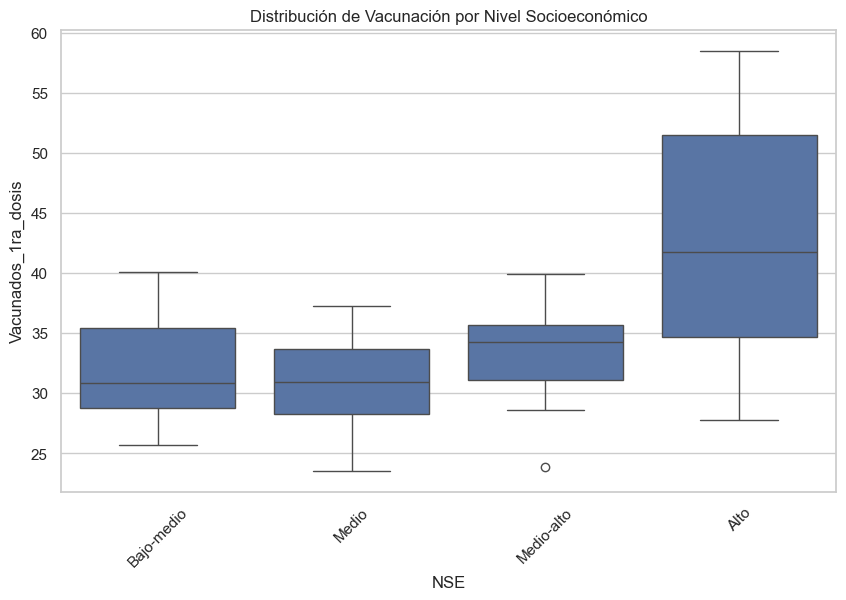

In [73]:
# Boxplot de vacunación por NSE
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copia_m, x='NSE', y='Vacunados_1ra_dosis')
plt.title('Distribución de Vacunación por Nivel Socioeconómico')
plt.xticks(rotation=45)
plt.show()

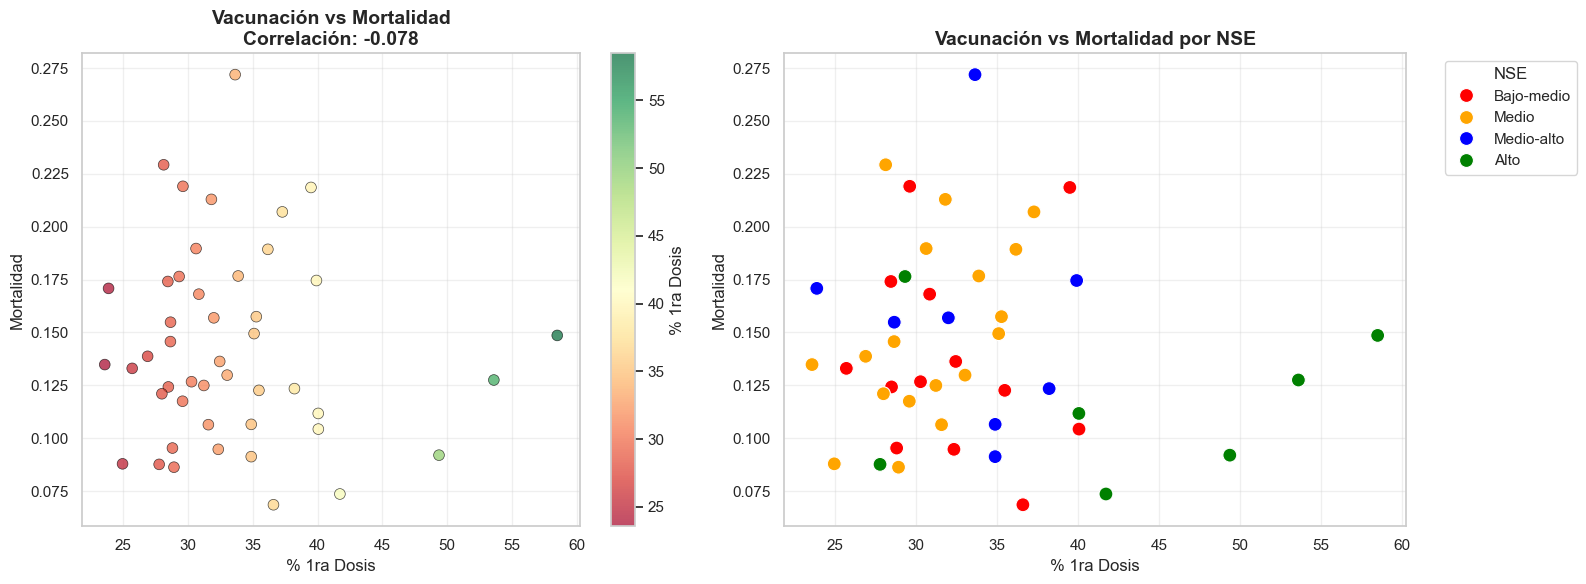

In [74]:
# Primero: gráfico de mortalidad vs 1era dosis, segundo NSE por mortalidad
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# GRÁFICO 1: Scatter con colormap
scatter1 = ax1.scatter(df_copia_m['Vacunados_1ra_dosis'], 
                      df_copia_m['Mortalidad'],
                      c=df_copia_m['Vacunados_1ra_dosis'], 
                      cmap='RdYlGn', s=60, alpha=0.7, 
                      edgecolors='black', linewidth=0.5)

corr1 = df_copia_m['Vacunados_1ra_dosis'].corr(df_copia_m['Mortalidad'])
ax1.set_xlabel('% 1ra Dosis')
ax1.set_ylabel('Mortalidad')
ax1.set_title(f'Vacunación vs Mortalidad\nCorrelación: {corr1:.3f}', fontsize=14, fontweight='bold')
plt.colorbar(scatter1, ax=ax1, label='% 1ra Dosis')
ax1.grid(True, alpha=0.3)

# GRÁFICO 2: Por NSE
scatter2 = sns.scatterplot(data=df_copia_m, 
                          x='Vacunados_1ra_dosis', 
                          y='Mortalidad', 
                          hue='NSE', s=100, ax=ax2,
                          palette={'Alto': 'green', 'Medio-alto': 'blue', 
                                  'Medio': 'orange', 'Bajo-medio': 'red'})
ax2.set_xlabel('% 1ra Dosis')
ax2.set_ylabel('Mortalidad')
ax2.set_title('Vacunación vs Mortalidad por NSE', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(title='NSE', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Como podemos notar, ya con los datos del NSE por comuna, se ve una relación entre la cantidad de dosis administradas de la vacuna por porcentaje de población y su NSE, siendo las categorías de "Medio" y "Bajo-medio" aquellas con menos vacunas (teniendo la misma media). Además, podemos notar que la mortalidad se ve reducida notoriamente en comunas de altos ingresos, incluso en aquellas comunas con más bajo rango de vacunación. Luego, exceptuando una comuna, el NSE "Medio-alto" se ve más afectado que las comunas "Alto", pero sin pasar el rango de 0.175 aprox. de mortalidad, sin embargo las comunas Medio y Bajo-medio no siguen patrones consistentes en cuanto a mortalidad, siendo ruidaosas en el mapa, sobretodo la categoría "Medio". Con esto no podemos concluir que las vacunas hayan sido un causante de la baja mortalidad, sin embargo es válido plantearnos la pregunta si en realidad se distribuyen mejor los recursos a las comunas con alto NSE y es por etso la notoria subida en % de vacunación, además de presentar un patrón persistente de baja mortalidad al contrario de las otras comunas, que van de Medio-alto a Bajo-medio, donde más se nota la diferencia en Medio y Bajo-medio. Las variables que crean este fenómeno no se pueden concluir con nuestras bases de datos actuales, pero sería interesante, a futuro, investigar si esto se debió a diferencias en centros médicos, estilos de vida (como trabajos), exposición a lugares públicos como el transporte, etc.

# **Porcentaje de cobertura de casos sospechosos vs NSE**

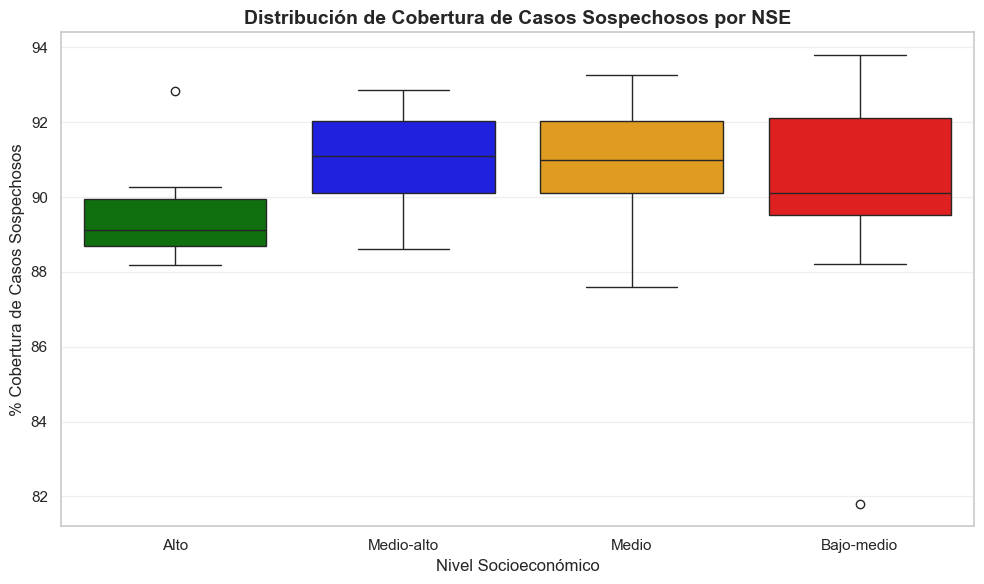

In [75]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copia_m, x='NSE', y='Cobertura_casos_sospechosos', 
            hue='NSE',
            palette={'Alto': 'green', 'Medio-alto': 'blue', 'Medio': 'orange', 'Bajo-medio': 'red'},
            order=['Alto', 'Medio-alto', 'Medio', 'Bajo-medio'],
            legend=False)
plt.xlabel('Nivel Socioeconómico')
plt.ylabel('% Cobertura de Casos Sospechosos')
plt.title('Distribución de Cobertura de Casos Sospechosos por NSE', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

El porcentaje de cubrimiento de casos sospechosos es más bajo de lo normal en el sector Alto, mientras que en los otros niveles NSE se mantiene bastante estable, siendo Bajo-medio el único con un outlier bastante más abajo que los demás, y una media más baja que Medio-alto y Medio (pero más alta que Alto). Sin embargo, incluso con el outlier más bajo, se tiene un muy buen porcentaje de cobertura en todas las comunas: mayor al 80%, y un promedio aprox. del 90%. Por lo tanto, las diferencias, al ser de tan poco rango, podrían considerarse son clínicamente irrelevantes en el contexto de un sistema que logró coberturas excepcionales (>90%) de manera equitativa en todo el espectro socioeconómico. No así con las vaucnas.

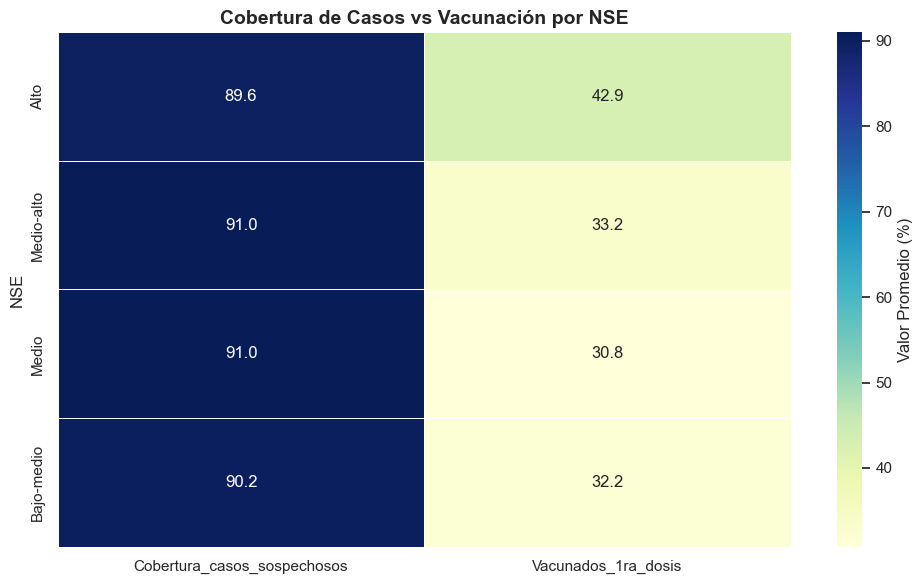

In [76]:
# Crear matriz para heatmap
heatmap_data = df_copia_m.groupby('NSE')[['Cobertura_casos_sospechosos', 'Vacunados_1ra_dosis']].mean()
heatmap_data = heatmap_data.reindex(['Alto', 'Medio-alto', 'Medio', 'Bajo-medio'])

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.1f', 
            linewidths=0.5, cbar_kws={'label': 'Valor Promedio (%)'})
plt.title('Cobertura de Casos vs Vacunación por NSE', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

C:\Users\isimo\AppData\Local\Temp\ipykernel_18984\240893698.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_copia_m, x='NSE', y='Cobertura_casos_sospechosos',


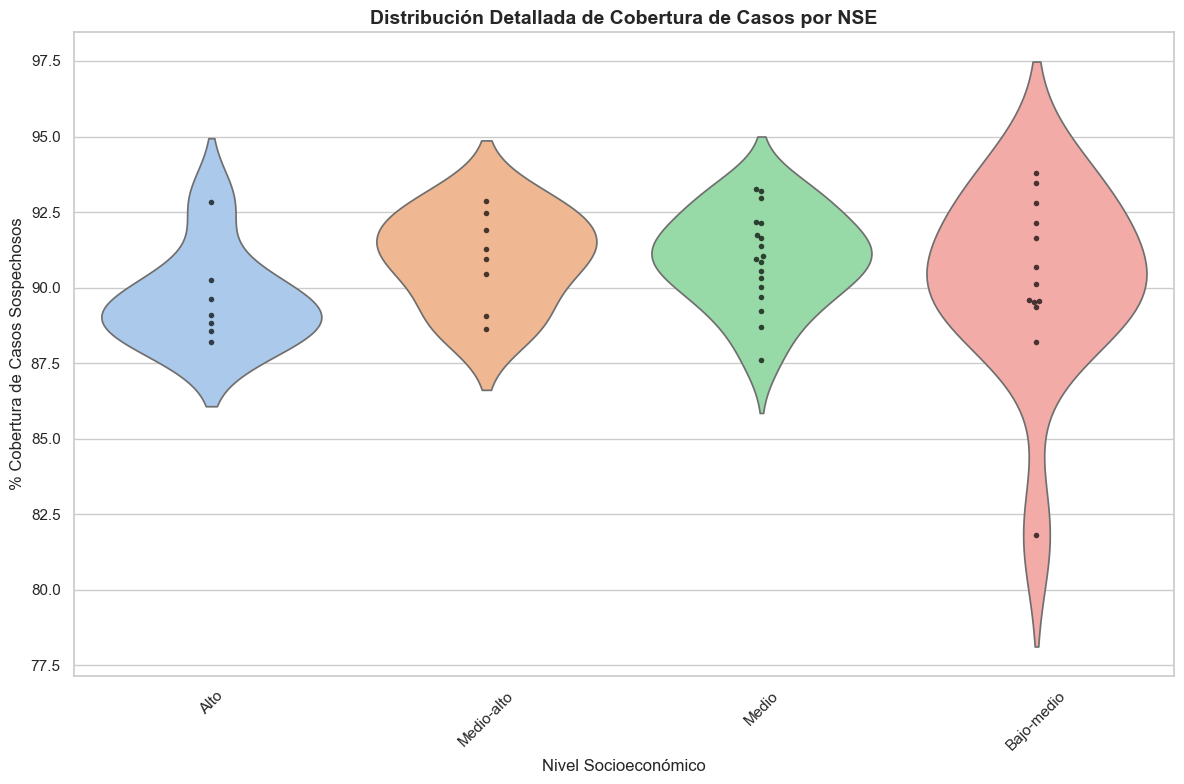

In [77]:
plt.figure(figsize=(12, 8))

# Violin plot
sns.violinplot(data=df_copia_m, x='NSE', y='Cobertura_casos_sospechosos', 
               palette='pastel', inner=None, order=['Alto', 'Medio-alto', 'Medio', 'Bajo-medio'])
# Swarm plot para ver puntos individuales
sns.swarmplot(data=df_copia_m, x='NSE', y='Cobertura_casos_sospechosos', 
              color='black', alpha=0.7, size=4, order=['Alto', 'Medio-alto', 'Medio', 'Bajo-medio'])

plt.title('Distribución Detallada de Cobertura de Casos por NSE', fontsize=14, fontweight='bold')
plt.xlabel('Nivel Socioeconómico')
plt.ylabel('% Cobertura de Casos Sospechosos')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()